### Problem 1: Using Dataset - Rose.csv

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### Dataset: Rose.csv



#### 1.1. Read the data as an appropriate Time Series data and plot the data.
#### 1.2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
#### 1.3. Split the data into training and test. The test data should start in 1991.
#### 1.4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
#### Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.
#### 1.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
#### Note: Stationarity should be checked at alpha = 0.05.
#### 1.6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
#### 1.7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
#### 1.8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
#### 1.9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
#### 1.10.Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

***1.1. Read the data as an appropriate Time Series data and plot the data.***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
os.getcwd()

'/home/jovyan/demo'

In [2]:
df_rose = pd.read_csv('/home/jovyan/demo/Rose.csv',parse_dates=True,index_col=0)
df_rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [3]:
df_rose.tail()

,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


In [4]:
df_rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [5]:
# Plot the Time Series to understand the behaviour of the data

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

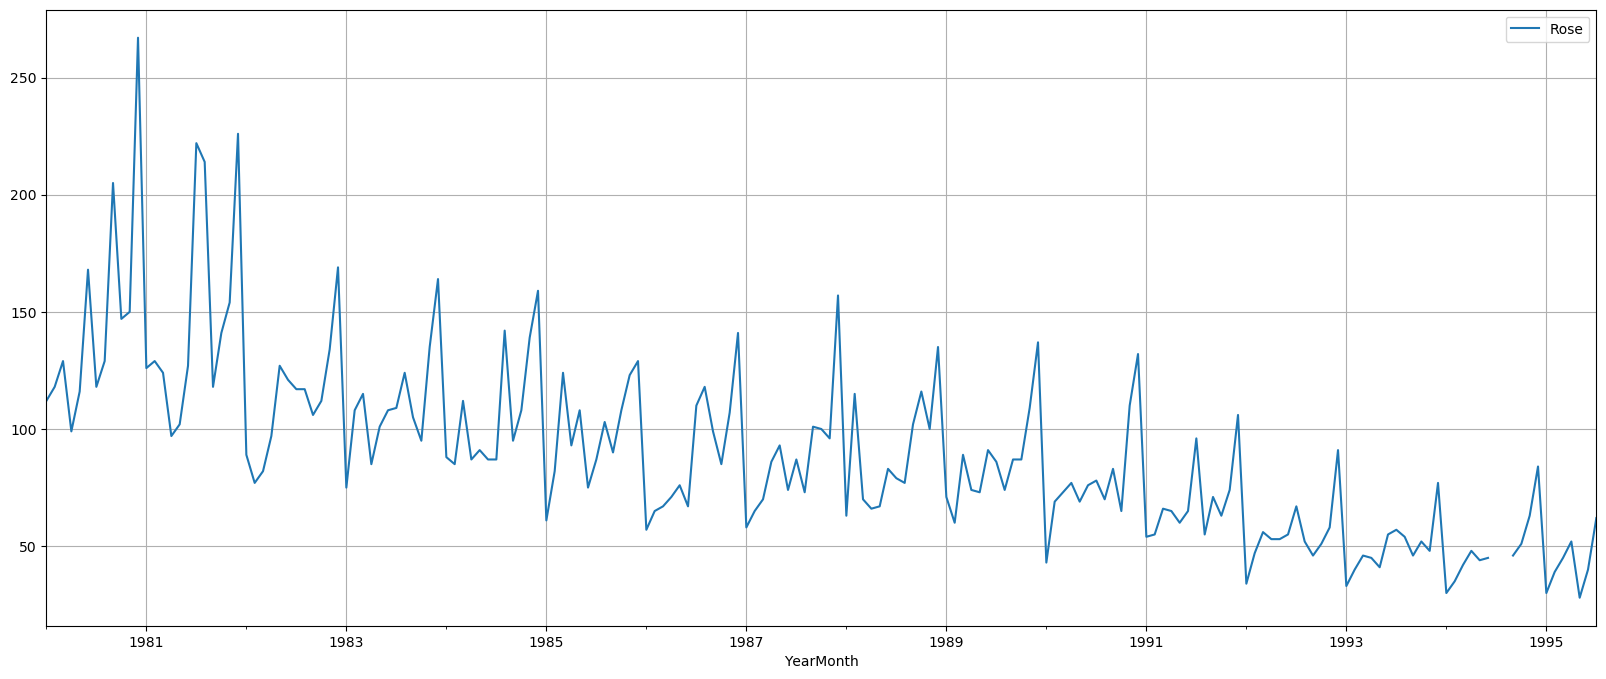

In [6]:
df_rose.plot()
plt.grid()
plt.show()

In [7]:
#It seems the data has  both trend and seasonality

***1.2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.***

In [8]:
# Performing EDA
df_rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [9]:
df_rose.isnull().sum()

Rose    2
dtype: int64

In [10]:
df_rose[df_rose. isnull().any(axis=1)]

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


In [11]:
#Using value of previous row to fill the missing value

df_rose1 = df_rose.bfill()

In [12]:
df_rose1.isnull().sum()

Rose    0
dtype: int64

In [13]:
df_rose1[df_rose1.index.duplicated()]

,Rose
YearMonth,


In [14]:
# No duplicate records.

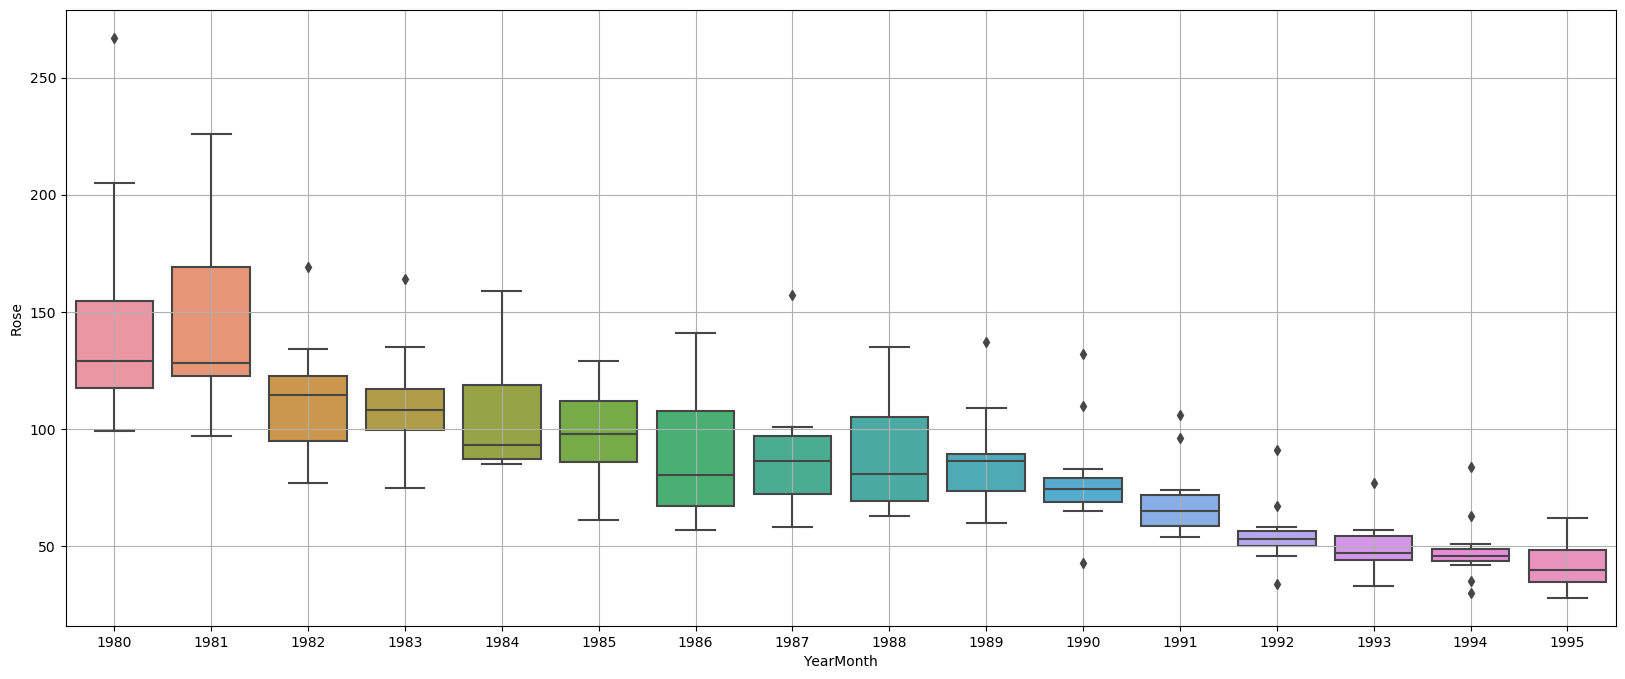

In [15]:
# Plot a boxplot to understand the spread of sales across different months  across years.
# Yearly plot
sns.boxplot(x = df_rose1.index.year,y = df_rose1['Rose'])
plt.grid()
plt.show()

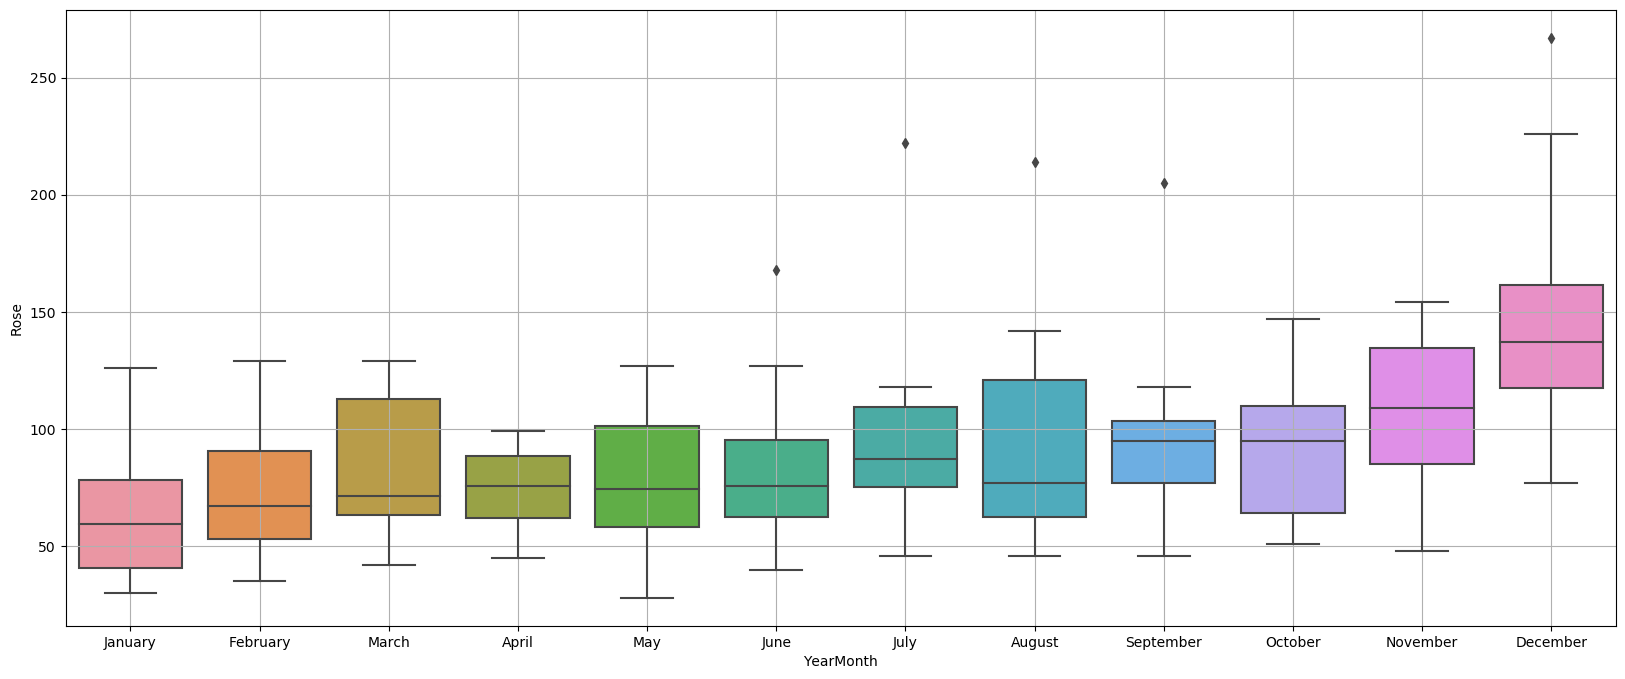

In [16]:
# Monthly plot

sns.boxplot(x = df_rose1.index.month_name(),y = df_rose1['Rose'])
plt.grid()
plt.show()

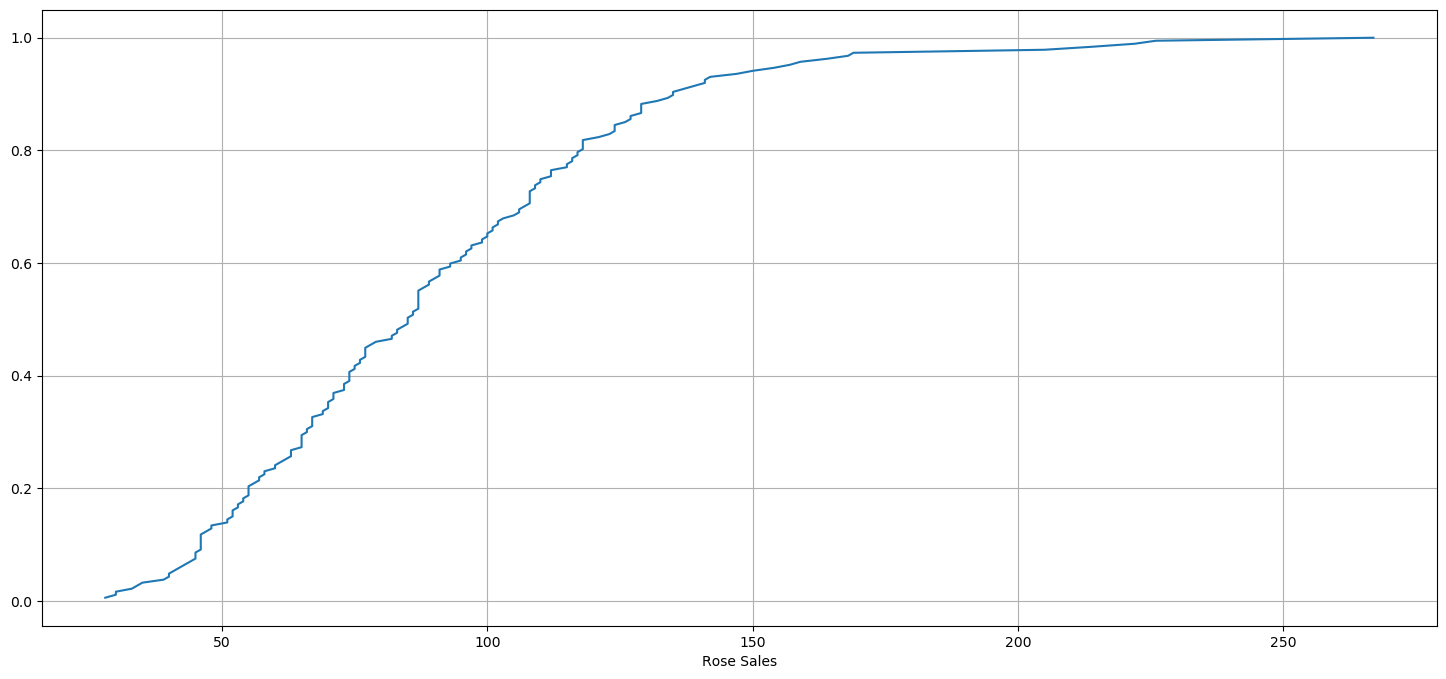

In [17]:
# Plotting the Empirical Cumulative Distribution
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (18, 8))
cdf = ECDF(df_rose1['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose Sales')
plt.show()

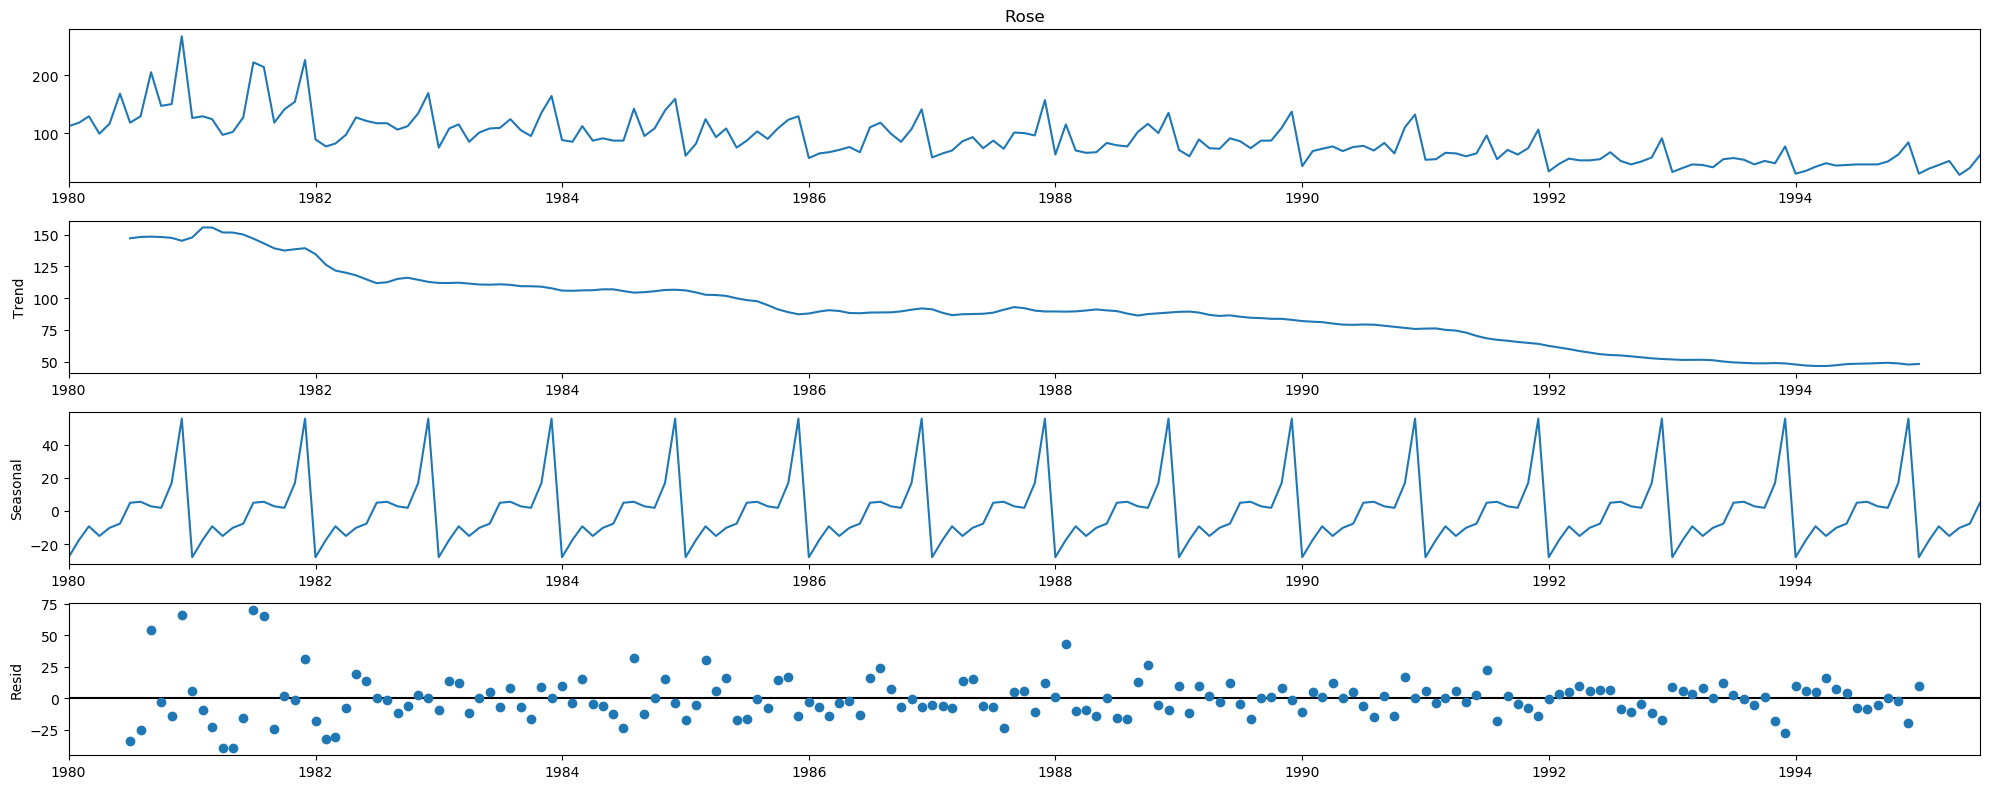

In [18]:
# Decompose the Time Series and plot the different components using additive method
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition_add = seasonal_decompose(df_rose1['Rose'],model='additive')
decomposition_add.plot();
plt.show()

In [19]:
trend = decomposition_add.trend
seasonality = decomposition_add.seasonal
residual = decomposition_add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.914120
1980-02-01   -17.440509
1980-03-01    -9.291700
1980-04-01   -15.104200
1980-05-01   -10.202414
1980-06-01    -7.684557
1980-07-01     4.935880
1980-08-01     5.516435
1980-09-01     2.769213
1980-10-01     1.866435
1980-11-01    16.841435
1980-12-01    55.708102
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.019213
1980-08-01   -24.641435
1980-09-01    53.855787
1980-10-01    -2.949769
1980-11-01   -14.258102
1980-12-01    66.16689

In [20]:
# Checking the mean of residual and testing for normality of the residuals

residual.mean()

-0.08032407407406716

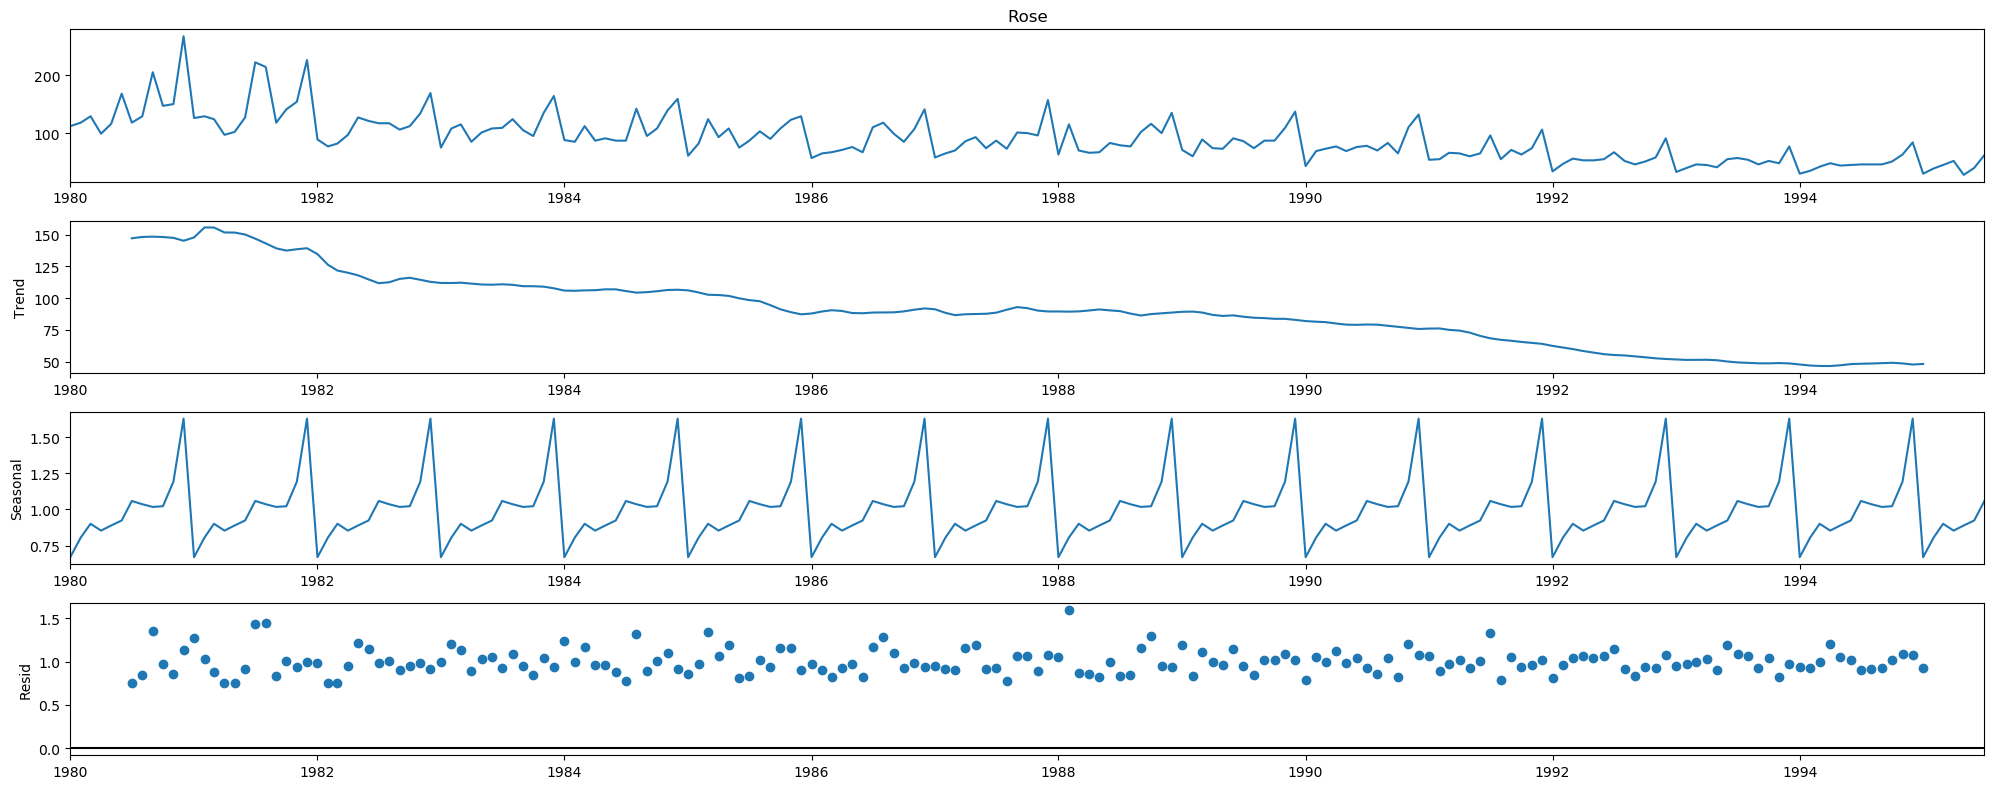

In [21]:
# Decompose the Time Series and plot the different components using multiplicative method
from    statsmodels.tsa.seasonal import   seasonal_decompose
decomposition_multiplicative = seasonal_decompose(df_rose1['Rose'],model='multiplicative')
decomposition_multiplicative.plot();
plt.show()

In [22]:
trend1 = decomposition_multiplicative.trend
seasonality1 = decomposition_multiplicative.seasonal
residual1 = decomposition_multiplicative.resid

print('Trend','\n',trend1.head(12),'\n')
print('Seasonality','\n',seasonality1.head(12),'\n')
print('Residual','\n',residual1.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670042
1980-02-01    0.806088
1980-03-01    0.901053
1980-04-01    0.853896
1980-05-01    0.889301
1980-06-01    0.923873
1980-07-01    1.058855
1980-08-01    1.036236
1980-09-01    1.017545
1980-10-01    1.022460
1980-11-01    1.192205
1980-12-01    1.628448
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.757674
1980-08-01    0.840432
1980-09-01    1.357812
1980-10-01    0.970879
1980-11-01    0.853481
1980-12-01    1.129783
Name: resid, dtype: fl

In [23]:
# Checking the mean of residual and testing for normality of the residuals

residual1.mean()

0.9994553586957373

In [24]:
# The multiplicative decomposition seems more accurate then additive as residual shows a continuous series without any pattern and also the residual mean of Multiplicative
# is close to 1 which satisfy the condition for multiplicative seasonality

***1.3. Split the data into training and test. The test data should start in 1991.***

In [25]:
# Splitting the data into training and test

train_rose=df_rose1[df_rose1.index.year < 1991]
test_rose=df_rose1[df_rose1.index.year >= 1991]


In [26]:
print('First few rows of Training Data')
print(train_rose.head())
print('Last few rows of Training Data')
print(train_rose.tail())
print('First few rows of Test Data')
print(test_rose.head())
print('Last few rows of Test Data')
print(test_rose.tail())

First few rows of Training Data
             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
Last few rows of Training Data
             Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0
First few rows of Test Data
            Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0
Last few rows of Test Data
            Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


***1.4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data.
Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.***

In [27]:
# Exponential smoothing using Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [28]:
SES_train = train_rose.copy()
SES_test = test_rose.copy()

model_SES = SimpleExpSmoothing(SES_train['Rose'])
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


{'smoothing_level': 0.09874989743650385,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38699692184085,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test_rose))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104999
1991-02-01,55.0,87.104999
1991-03-01,66.0,87.104999
1991-04-01,65.0,87.104999
1991-05-01,60.0,87.104999


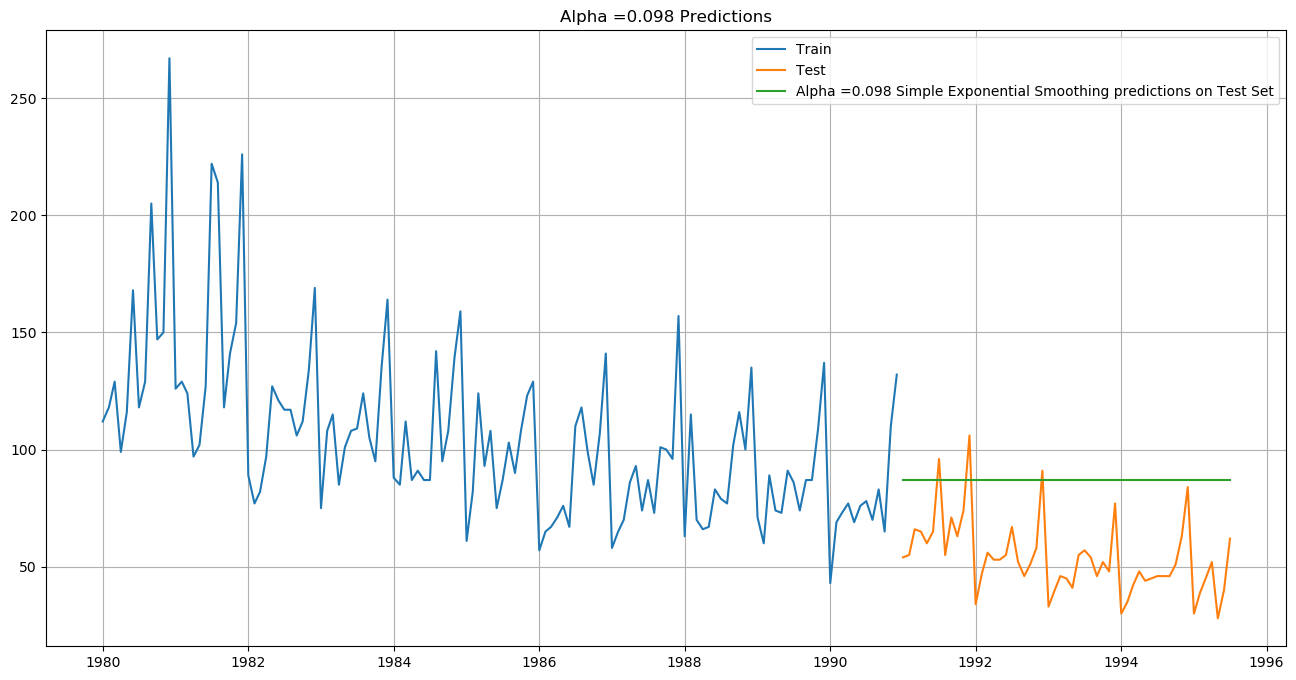

In [30]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');
plt.show()

In [31]:
#Model Evaluation for  𝛼  = 0.098 : Simple Exponential Smoothing¶
from math import sqrt
from sklearn import metrics
RMSE_SES_TEST = sqrt(metrics.mean_squared_error(SES_test['Rose'],SES_test['predict']))
print("For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(RMSE_SES_TEST))

For Alpha =0.098 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.776


In [33]:
# Exponential smoothing using Double Exponential Smoothing (Holt's Model)

DES_train = train_rose.copy()
DES_test = test_rose.copy()

In [34]:
model_DES = Holt(DES_train['Rose'])

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
## First we will define an empty dataframe to store our values 
DES_MODEL_EVALUATION = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Test RMSE': []})


In [36]:
import warnings
warnings.filterwarnings('ignore')


for i in np.arange(0.3,1,0.05):
    for j in np.arange(0.3,1,0.05):
        model_DES1 = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES1.fittedvalues
        DES_test['predict',i,j] = model_DES1.forecast(steps=len(test_rose))
        
        RMSE_DES_TEST  = sqrt(metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j]))
        DES_MODEL_EVALUATION = DES_MODEL_EVALUATION.append({'Alpha Values':i,'Beta Values':j,
                                          'Test RMSE':RMSE_DES_TEST}, ignore_index=True)
        


In [37]:
DES_MODEL_EVALUATION.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Test RMSE
0,0.30,0.30,265.543452
14,0.35,0.30,305.319536
1,0.30,0.35,311.814949
28,0.40,0.30,339.282400
15,0.35,0.35,355.764888


In [38]:
RMSE_DES=DES_MODEL_EVALUATION.sort_values(by=['Test RMSE']).values[0][2]
RMSE_DES

265.54345194585756

In [33]:
# Exponential smoothing using Triple Exponential Smoothing (Holt - Winter's Model)
        
TES_train = train_rose.copy()
TES_test = test_rose.copy()

In [34]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [35]:
model_TES_autofit = model_TES.fit()

In [36]:
model_TES_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [37]:
## Prediction on the test data
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test_rose))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,55.942246
1991-02-01,55.0,63.240624
1991-03-01,66.0,68.899674
1991-04-01,65.0,60.007486
1991-05-01,60.0,67.257150


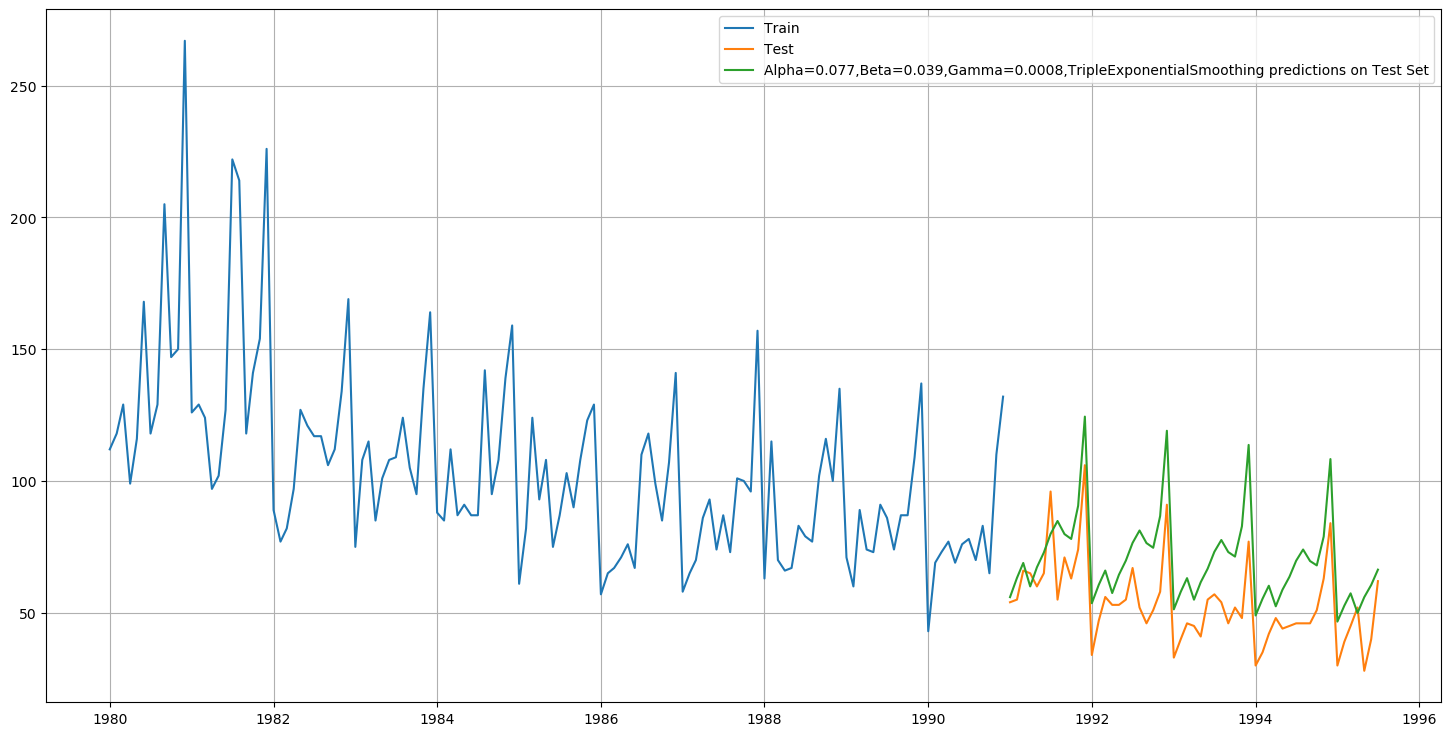

In [38]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.077,Beta=0.039,Gamma=0.0008,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();
plt.show()

In [39]:
## Test Data
RMSE_TES_TEST= sqrt(metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict']))
print("For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(RMSE_TES_TEST))

For Alpha=0.077,Beta=0.039,Gamma=0.0008, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 19.089


In [40]:
# Applying Linear Regression
len(train_rose)

132

In [47]:
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time_rose)
print('Test Time instance','\n',test_time_rose)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [48]:
LinearRegression_train = train_rose.copy()
LinearRegression_test = test_rose.copy()

In [49]:
LinearRegression_train['time'] = train_time_rose
LinearRegression_test['time'] = test_time_rose

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [20]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

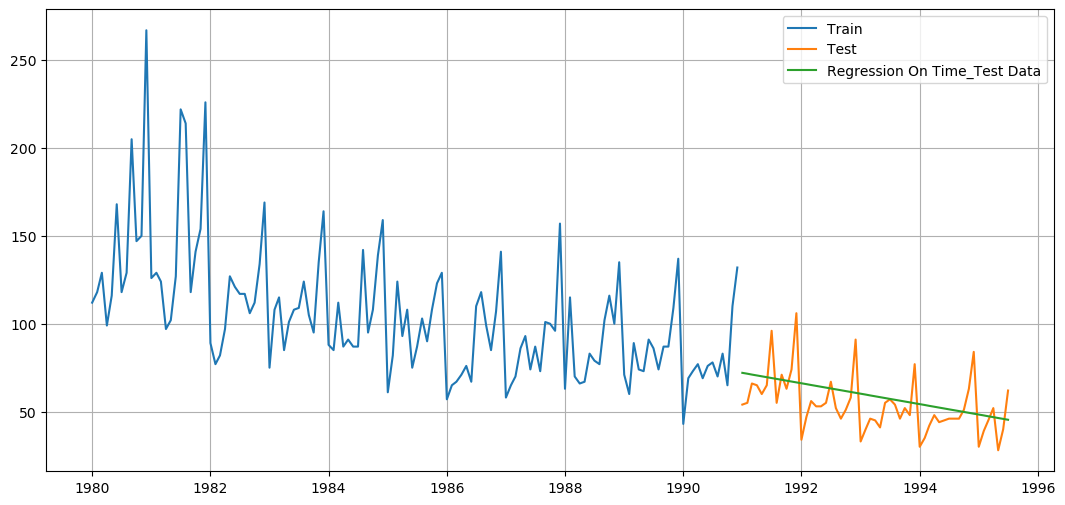

In [52]:
model_LR = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['prediction'] = model_LR

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test['prediction'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();
plt.show()

In [53]:
LinearRegression_test.head()

,Rose,time,prediction
YearMonth,,,
1991-01-01,54.0,133,72.063266
1991-02-01,55.0,134,71.568888
1991-03-01,66.0,135,71.074511
1991-04-01,65.0,136,70.580133
1991-05-01,60.0,137,70.085755


In [54]:
## Test Data - RMSE
RMSE_LR_TEST = sqrt(metrics.mean_squared_error(test_rose['Rose'],model_LR))
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(RMSE_LR_TEST))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.263


In [55]:
# Applying  Naive Approach

NaiveModel_train = train_rose.copy()
NaiveModel_test = test_rose.copy()

In [56]:
NaiveModel_test['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

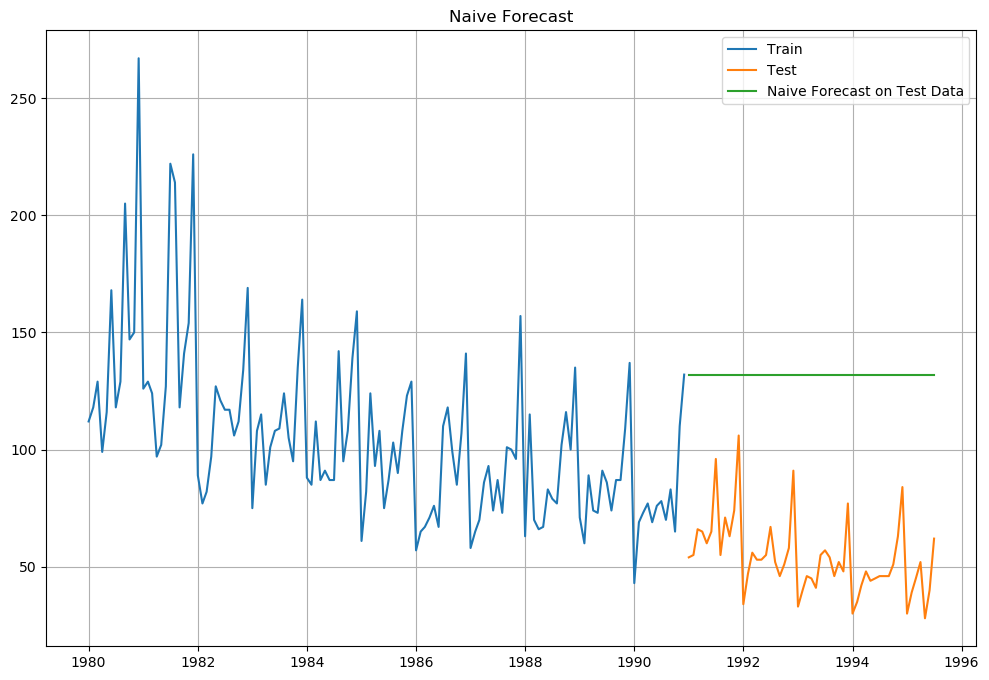

In [57]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();
plt.show()

In [58]:
## Test Data - RMSE
RMSE_NB_TEST = sqrt(metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test['naive']))
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(RMSE_NB_TEST))

For Naive forecast on the Test Data,  RMSE is 79.699


In [59]:
# Applying  Simple Average

In [60]:
SimpleAverage_train = train_rose.copy()
SimpleAverage_test = test_rose.copy()

In [61]:
SimpleAverage_test['mean_forecast'] = train_rose['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


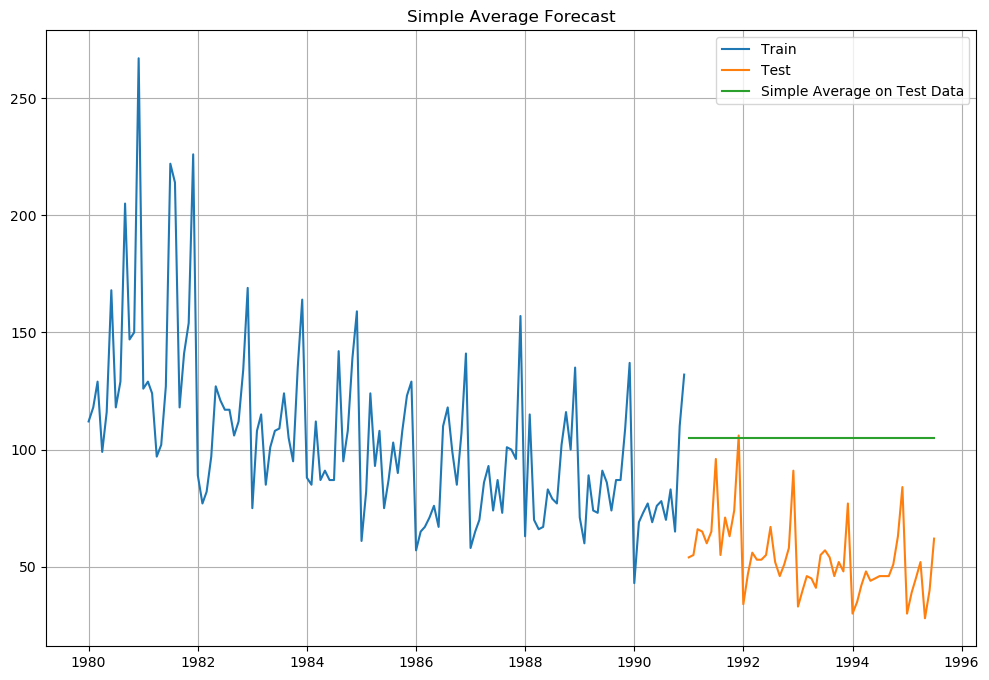

In [62]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();
plt.show()

In [63]:
## Test Data - RMSE 
RMSE_SA_TEST = sqrt(metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test['mean_forecast']))
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(RMSE_SA_TEST))

For Simple Average forecast on the Test Data,  RMSE is 53.440


In [64]:
# Moving Average(MA)
MovingAverage = df_rose1.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [65]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head(10)

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.50,NaN,NaN
1980-05-01,116.0,107.5,115.50,NaN,NaN
1980-06-01,168.0,142.0,128.00,123.666667,NaN
1980-07-01,118.0,143.0,125.25,124.666667,NaN
1980-08-01,129.0,123.5,132.75,126.500000,NaN
1980-09-01,205.0,167.0,155.00,139.166667,132.666667


In [66]:
MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]



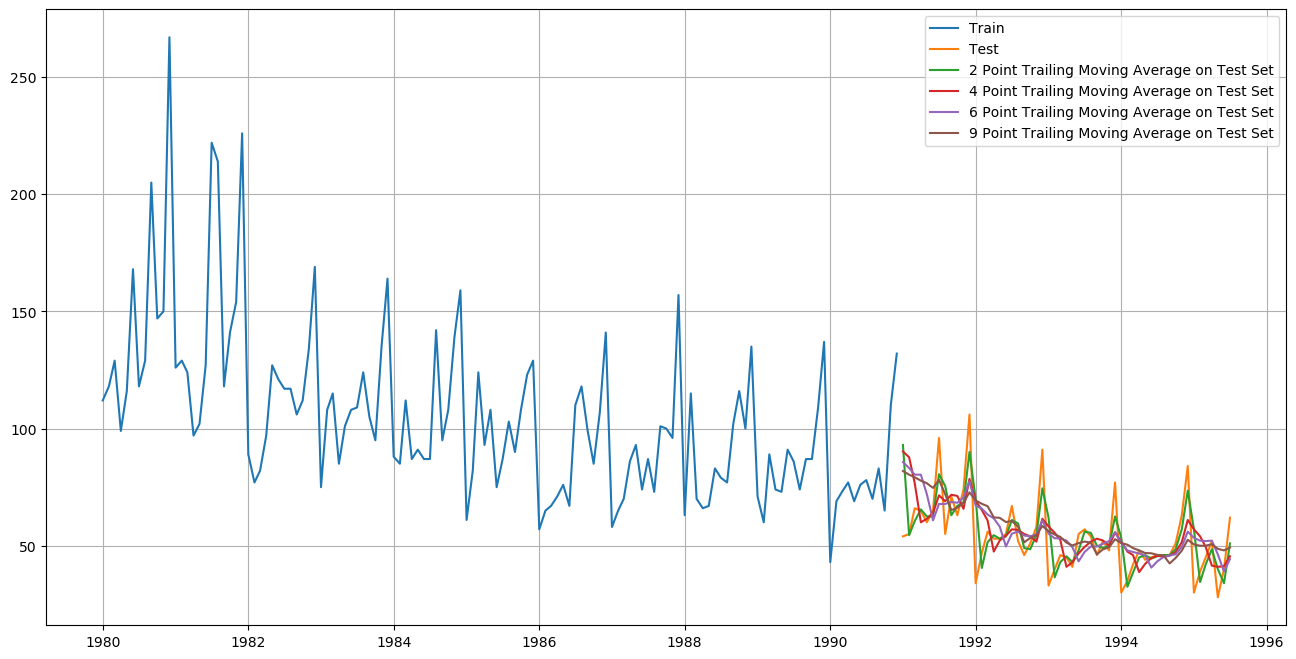

In [67]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')
plt.plot(MovingAverage_test['Rose'], label='Test')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid()
plt.show()

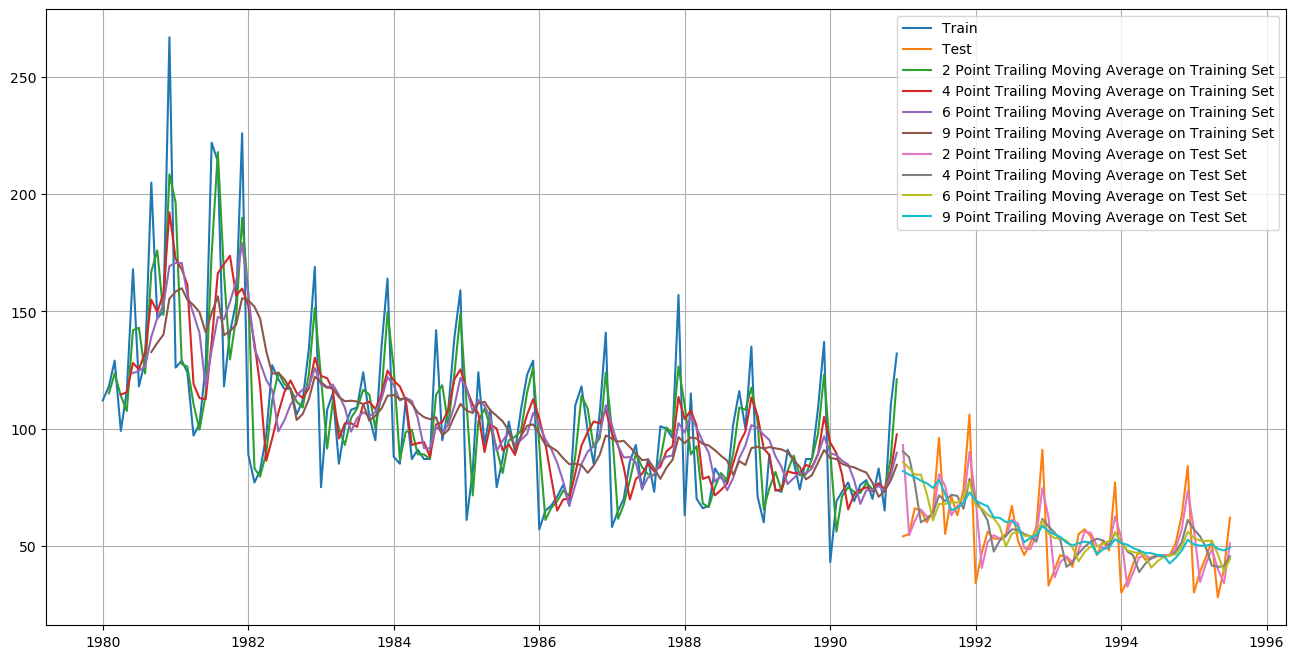

In [68]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage_train['Rose'], label='Train')
plt.plot(MovingAverage_test['Rose'], label='Test')

plt.plot(MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [69]:
## Test Data - RMSE --> 2 point Trailing MA

RMSE_MA_TEST_2 = sqrt(metrics.mean_squared_error(test_rose['Rose'],MovingAverage_test['Trailing_2']))
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_MA_TEST_2))

## Test Data - RMSE  --> 4 point Trailing MA

RMSE_MA_TEST_4 = sqrt(metrics.mean_squared_error(test_rose['Rose'],MovingAverage_test['Trailing_4']))
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_MA_TEST_4))

## Test Data - RMSE --> 6 point Trailing MA

RMSE_MA_TEST_6 = sqrt(metrics.mean_squared_error(test_rose['Rose'],MovingAverage_test['Trailing_6']))
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(RMSE_MA_TEST_6))

## Test Data - RMSE  --> 9 point Trailing MA

RMSE_MA_TEST_9 = sqrt(metrics.mean_squared_error(test_rose['Rose'],MovingAverage_test['Trailing_9']))
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(RMSE_MA_TEST_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.529
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.449
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.560
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.725 


In [70]:
RMSE_Analysis= pd.DataFrame({'Test RMSE': [RMSE_SES_TEST,RMSE_DES,RMSE_TES_TEST,RMSE_LR_TEST ,RMSE_NB_TEST,RMSE_SA_TEST ,RMSE_MA_TEST_2,RMSE_MA_TEST_4,RMSE_MA_TEST_6,RMSE_MA_TEST_9]}
                           ,index=['Simple Exp Smoothing','Double Exp Smoothing','Triple Exp Smoothing','Linear Regression','Naive Bayes','Simple Average','2 Point Moving Average','4 Point Moving Average','6 Point Moving Average','9 Point Moving Average'])

In [71]:
RMSE_Analysis.sort_values(by='Test RMSE',ascending=True)

,Test RMSE
2 Point Moving Average,11.529409
4 Point Moving Average,14.448930
6 Point Moving Average,14.560046
9 Point Moving Average,14.724503
Linear Regression,15.262509
Triple Exp Smoothing,19.088888
Simple Exp Smoothing,36.775788
Simple Average,53.440426
Naive Bayes,79.699093
Double Exp Smoothing,265.543452


***1.5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.***

In [72]:
#The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently 
#whether the series is non-stationary.

#The hypothesis in a simple form for the ADF test is:

# 𝐻0  : The Time Series has a unit root and is thus non-stationary.
# 𝐻1  : The Time Series does not have a unit root and is thus stationary.
# We would want the series to be stationary for building ARIMA models 
# and thus we would want the p-value of this test to be less than the  𝛼  value of 0.05.


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')


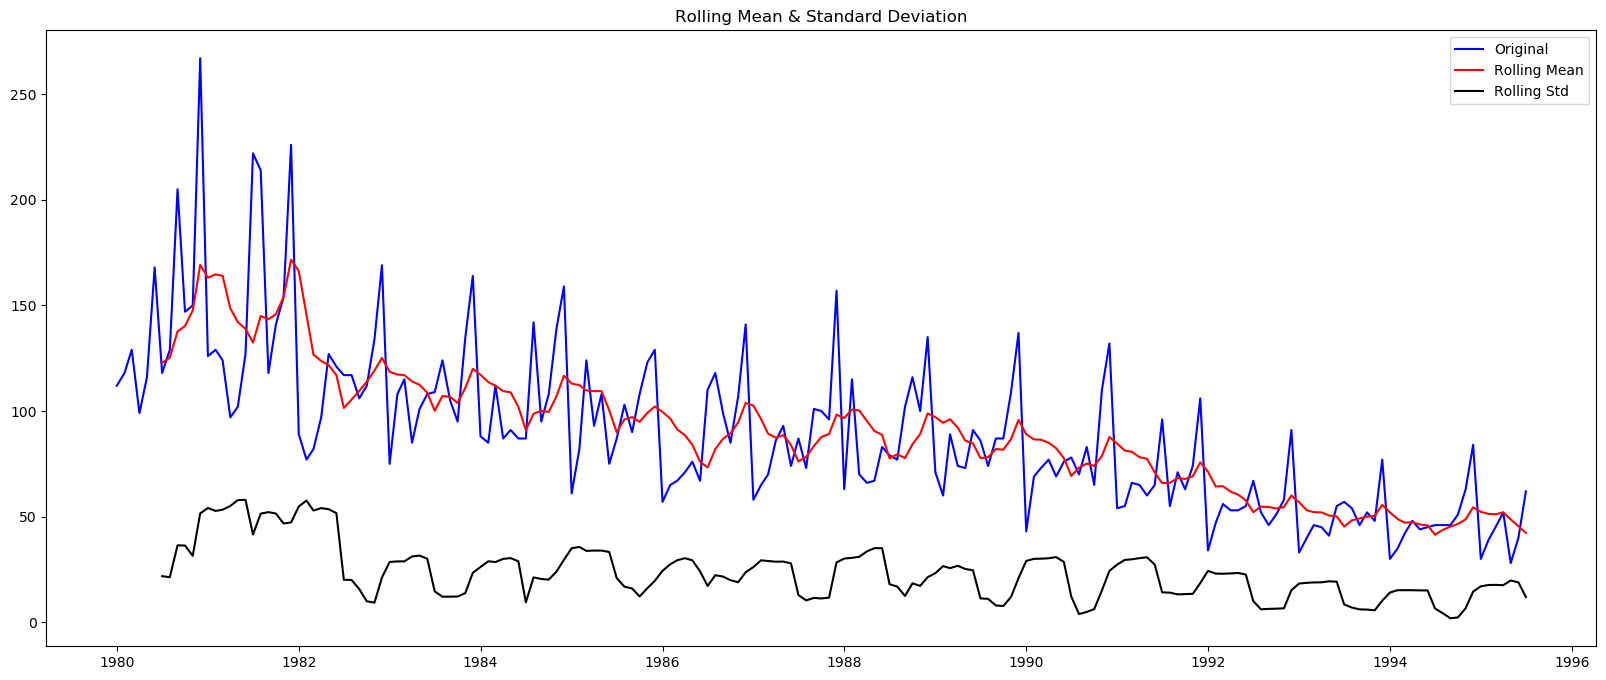

Results of Dickey-Fuller Test:
Test Statistic                  -1.877440
p-value                          0.342747
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [73]:
test_stationarity(df_rose1['Rose'])

In [74]:
#We see that at 5% significant level we are failed to reject Null Hypothesis and thus the data is non-stationary.

In [75]:
# Making the data as stationary, we are taking one level of differencing to see whether the series becomes stationary.

dftest = adfuller(df_rose1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.163
DF test p-value is 3.0082674578709354e-11
Number of lags used 12


In [76]:
# We see that p-value is lower than 0.05 and thus we can reject the null hypothesis. The data is now stationary

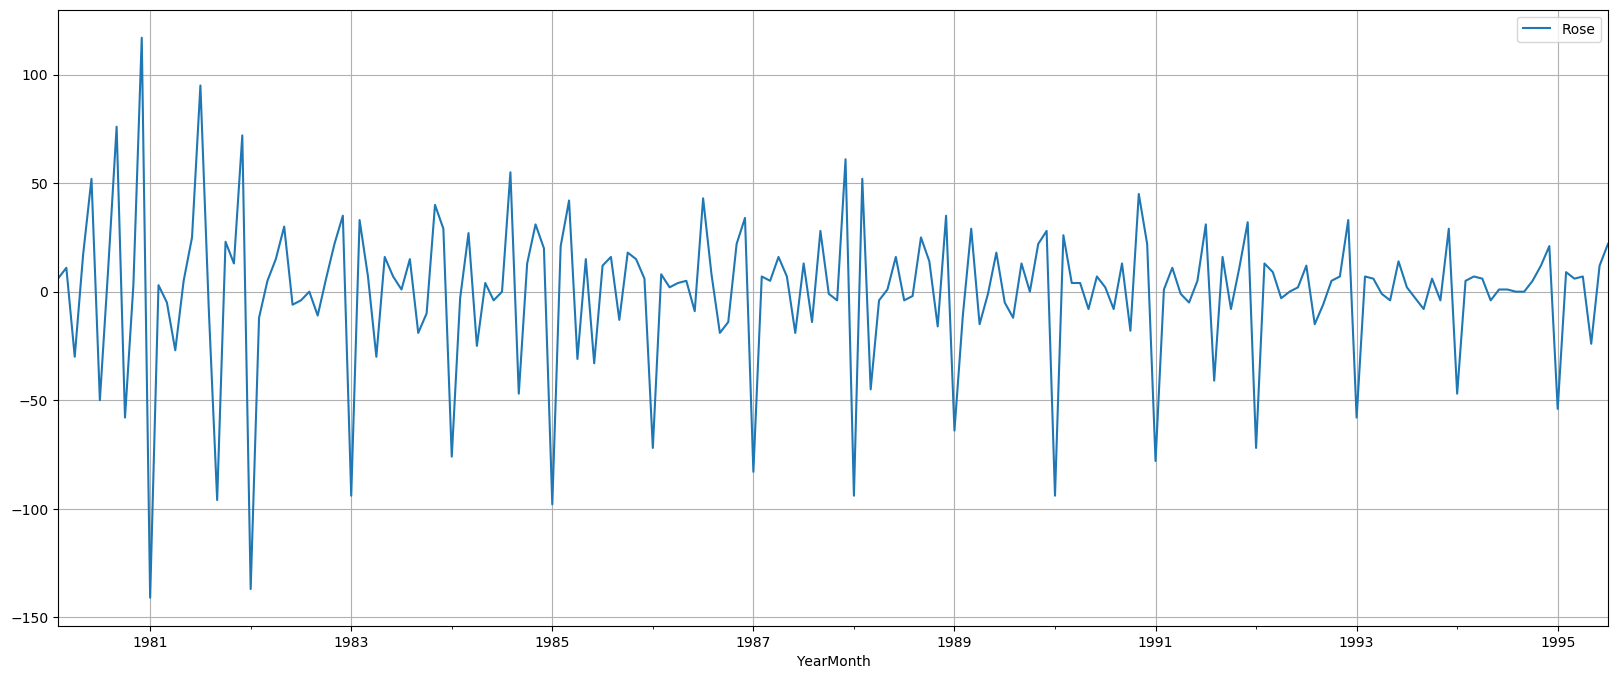

In [77]:
# Plotting the data after making it stationary

df_rose1.diff().dropna().plot(grid=True)
plt.show()

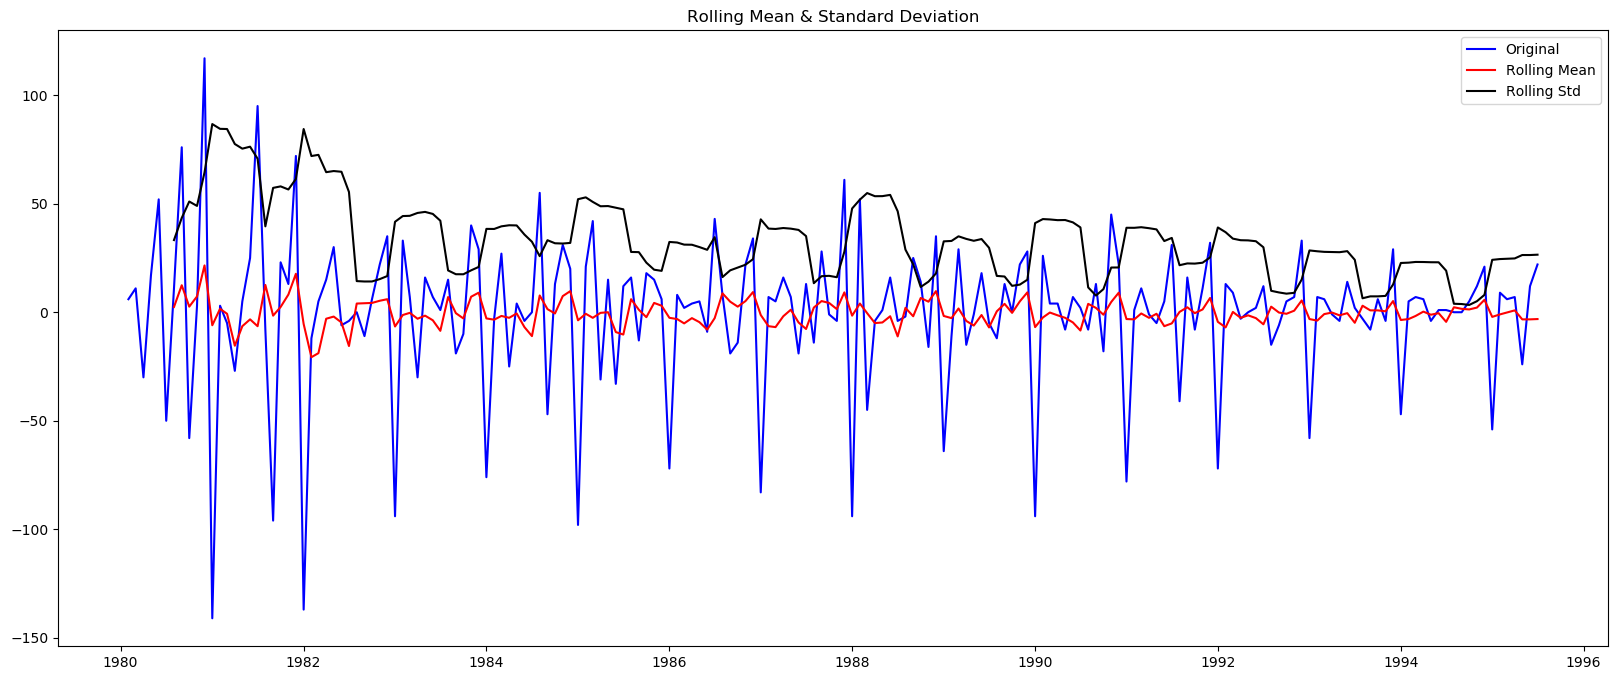

Results of Dickey-Fuller Test:
Test Statistic                -8.044614e+00
p-value                        1.808550e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [78]:
test_stationarity(df_rose1.diff().dropna())

***1.6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.***

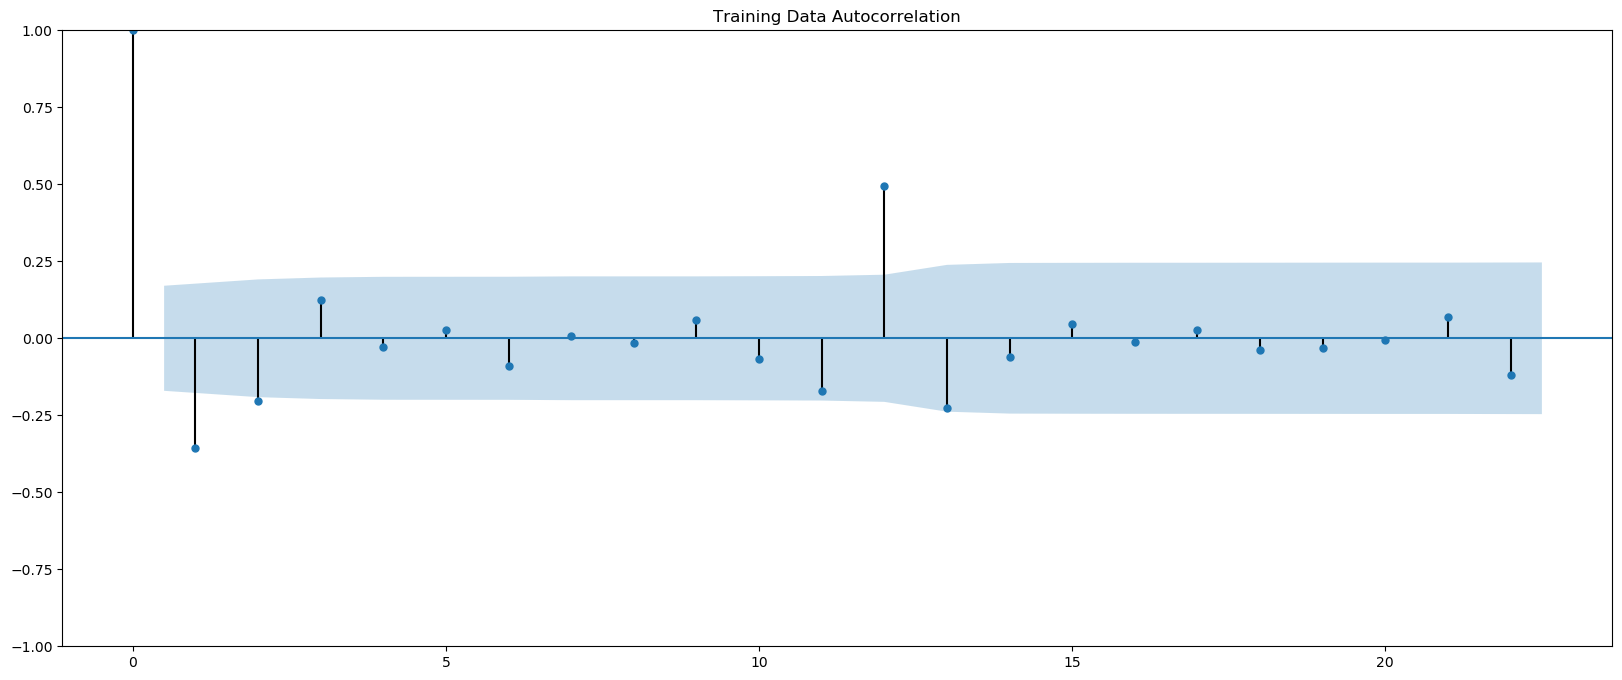

In [80]:
# We have seen above that the data has multiplicative seasonality so ideally we should build a SARIMA model. We can also verify the seasonality as below
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_rose.diff(),title='Training Data Autocorrelation',missing='drop')
plt.show()


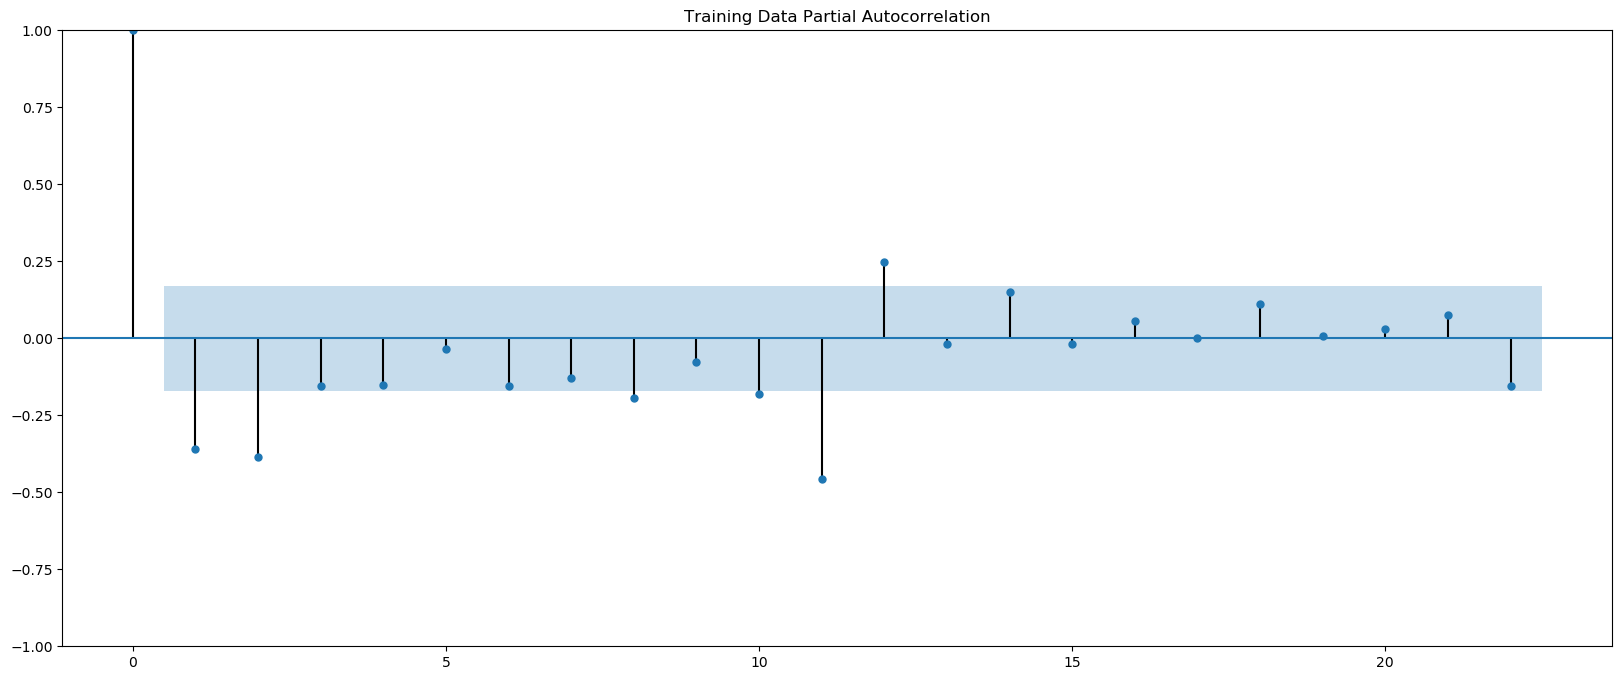

In [81]:
plot_pacf(train_rose.diff().dropna(),title='Training Data Partial Autocorrelation')
plt.show()

In [82]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 to 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.
# We see that there can be a seasonality of 6

# Considering Seasonality at 6

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [83]:
SARIMA_AIC_6 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_6

,param,seasonal,AIC


In [80]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_6 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_6 = SARIMA_model_6.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_6.aic))
        SARIMA_AIC_6 = SARIMA_AIC_6.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_6.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261113856
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471827267
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1081.2713830625223
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.787094514909
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266722053
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1058.9861743124368
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.453362951537
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426168447
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1058.8048206417398
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1061.368776514003
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1058.042505338202
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1058.89170958988
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548029532
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:

In [81]:
SARIMA_AIC_6.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",951.744298
59,"(0, 1, 3)","(2, 0, 3, 6)",952.073632
251,"(3, 1, 3)","(2, 0, 3, 6)",952.582103
191,"(2, 1, 3)","(3, 0, 3, 6)",953.205614
123,"(1, 1, 3)","(2, 0, 3, 6)",953.684954


In [84]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(2, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -464.872
Date:                           Fri, 17 Dec 2021   AIC                            951.744
Time:                                   17:19:18   BIC                            981.349
Sample:                               01-01-1980   HQIC                           963.750
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5027      0.083     -6.080      0.000      -0.665      -0.341
ar.L2         -0.6627      0.084     -7.917

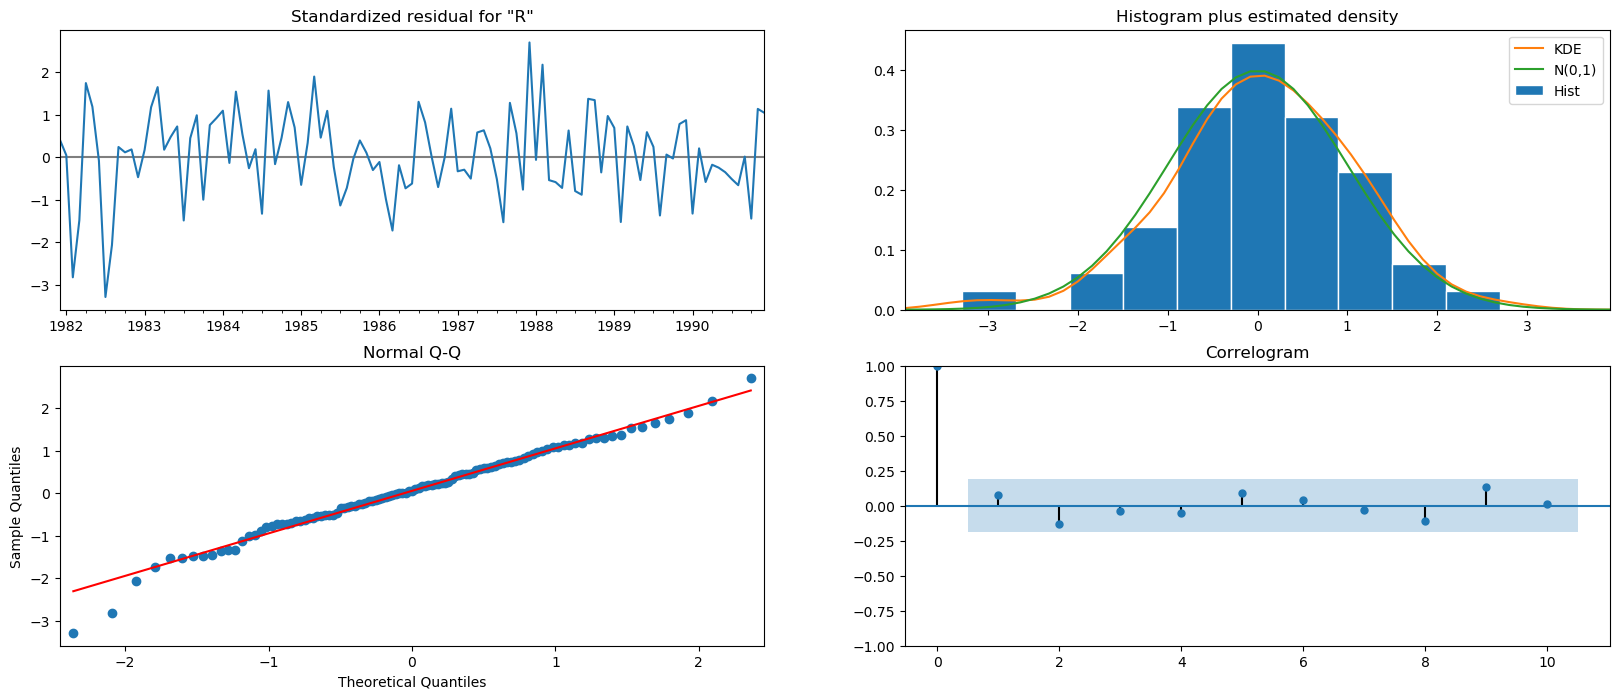

In [85]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [86]:
#Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_rose_6 = results_auto_SARIMA.get_forecast(steps=len(test_rose))

In [87]:
predicted_auto_SARIMA_rose_6.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,66.903116,16.350869,34.856002,98.950230
1991-02-01,65.992003,16.482225,33.687434,98.296571
1991-03-01,74.437427,16.588150,41.925251,106.949603
1991-04-01,76.043557,16.710773,43.291043,108.796071
1991-05-01,78.412731,16.711388,45.659012,111.166450


In [88]:
# Calculating the RMSE value
from sklearn import metrics
RMSE_SARIMA_6 = sqrt(metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose_6.predicted_mean))
RMSE_SARIMA_6

27.101048778976956

In [89]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12

,param,seasonal,AIC


In [90]:
# Considering Seasonality at 12

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [89]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_12 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_12 = SARIMA_model_12.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA_12.aic))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_12.aic}, ignore_index=True)
        


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207396
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380884
SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3684.862020345468
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386074
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.69136357536
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:4083.8608753357667
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697525
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894592
SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3638.1658145385513
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.7535403931056
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702723603
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.5304136126977
SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3685.8757206923665
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383966
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918346
SARIMA(0, 1, 1)x(0, 0, 

In [90]:
SARIMA_AIC_12.sort_values(by=['AIC']).head()

,param,seasonal,AIC
222,"(3, 1, 1)","(3, 0, 2, 12)",774.400288
238,"(3, 1, 2)","(3, 0, 2, 12)",774.880934
220,"(3, 1, 1)","(3, 0, 0, 12)",775.426699
221,"(3, 1, 1)","(3, 0, 1, 12)",775.495330
252,"(3, 1, 3)","(3, 0, 0, 12)",775.561018


In [91]:
import statsmodels.api as sm

auto_SARIMA1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA1 = auto_SARIMA1.fit(maxiter=1000)
print(results_auto_SARIMA1.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Fri, 17 Dec 2021   AIC                            774.400
Time:                                         17:20:24   BIC                            799.618
Sample:                                     01-01-1980   HQIC                           784.578
                                          - 12-01-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.201       0

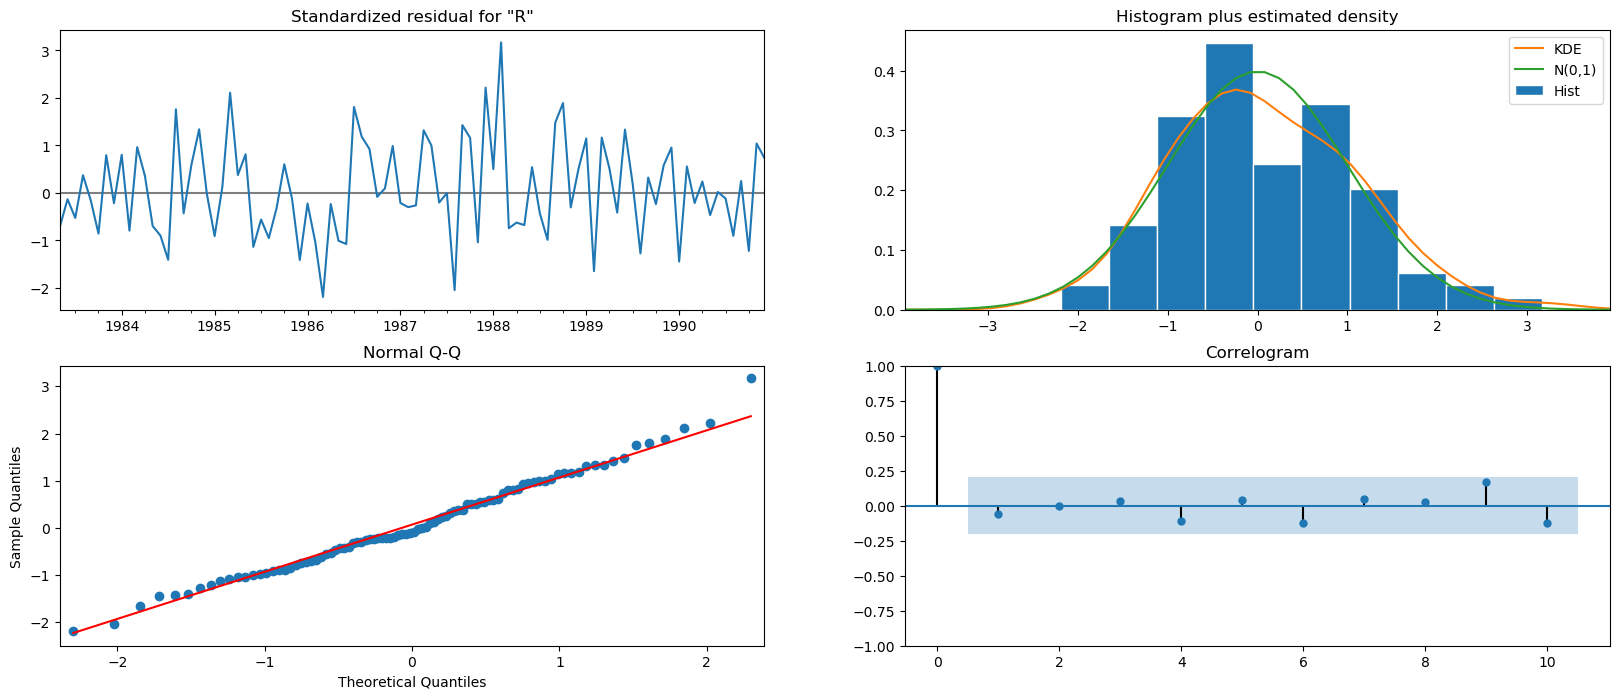

In [92]:
results_auto_SARIMA1.plot_diagnostics()
plt.show()

In [93]:
#Predict on the Test Set using this model and evaluate the model.

predicted_auto_SARIMA_rose_12 = results_auto_SARIMA1.get_forecast(steps=len(test_rose))

In [94]:
predicted_auto_SARIMA_rose_12.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-01-01,55.235650,13.906723,27.978974,82.492325
1991-02-01,68.121386,13.990155,40.701187,95.541585
1991-03-01,67.908898,14.011168,40.447513,95.370284
1991-04-01,66.785489,14.098483,39.152971,94.418007
1991-05-01,69.761094,14.107831,42.110252,97.411935


In [95]:
# Calculating the RMSE value
import math
from sklearn import metrics
RMSE_SARIMA_12 = math.sqrt(metrics.mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose_12.predicted_mean))
RMSE_SARIMA_12

18.860590760900703

In [96]:
RMSE_Analysis.loc['RMSE_SARIMA_6'] = [RMSE_SARIMA_6]
RMSE_Analysis.loc['RMSE_SARIMA_12'] = [RMSE_SARIMA_12]
RMSE_Analysis.sort_values(by='Test RMSE')

,Test RMSE
2 Point Moving Average,11.529409
4 Point Moving Average,14.448930
6 Point Moving Average,14.560046
9 Point Moving Average,14.724503
Linear Regression,15.262509
RMSE_SARIMA_12,18.860591
Triple Exp Smoothing,19.088888
RMSE_SARIMA_6,27.101049
Simple Exp Smoothing,36.775788
Simple Average,53.440426


***1.7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.***

In [97]:
# Plotting the ACF and PACF for the dataset

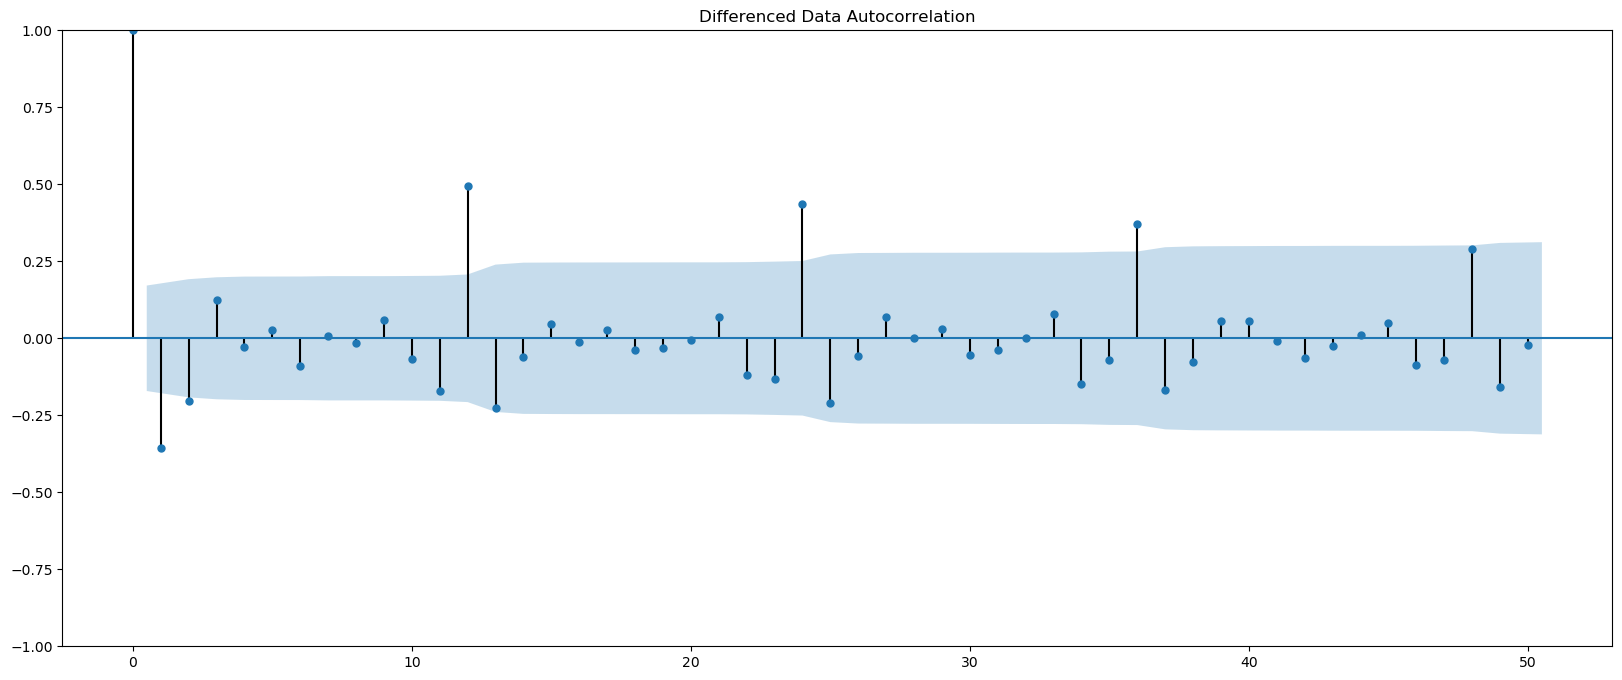

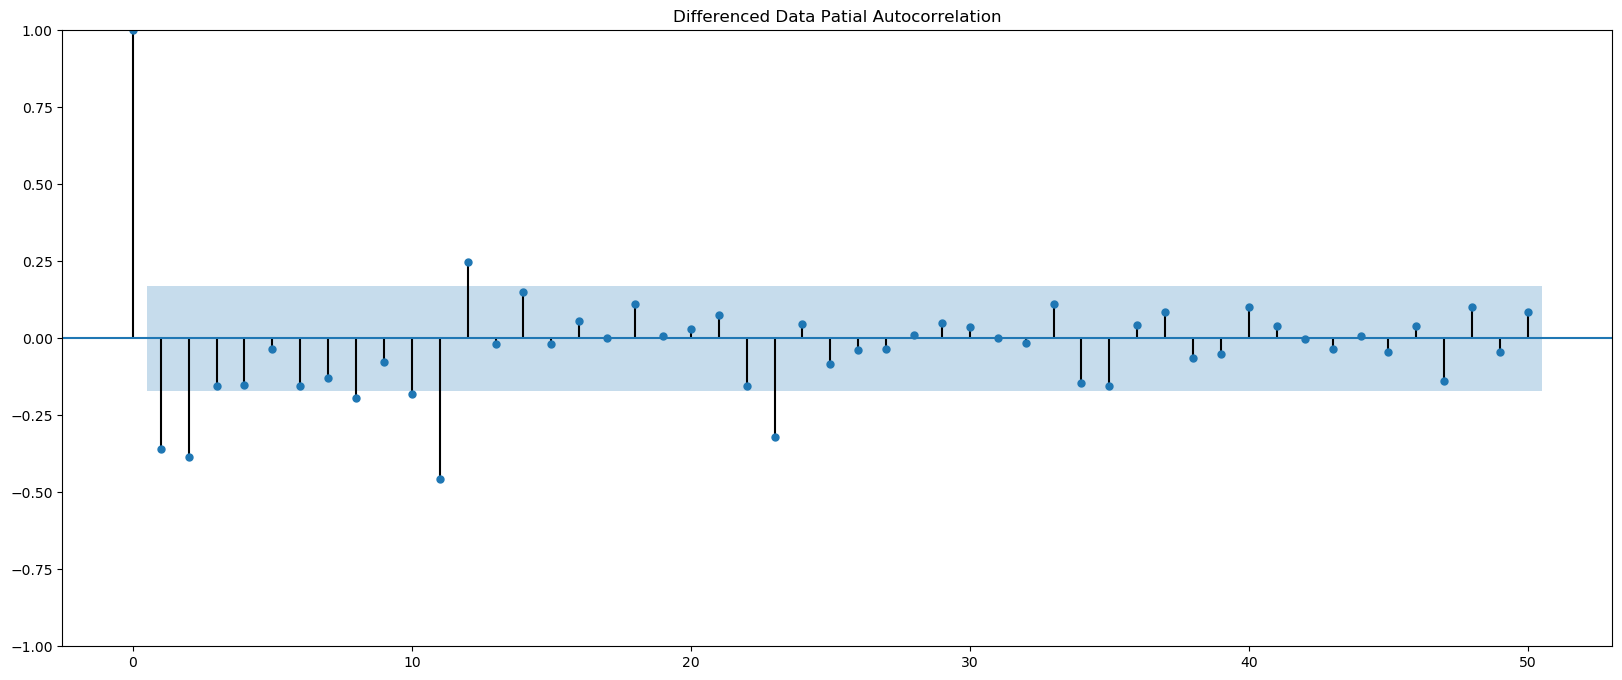

In [97]:
plot_acf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train_rose['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [99]:
#We see that our ACF plot at the seasonal interval (12) does not taper off. So, we go ahead and take a seasonal differencing of the 
#original series. Before that let us look at the original series.

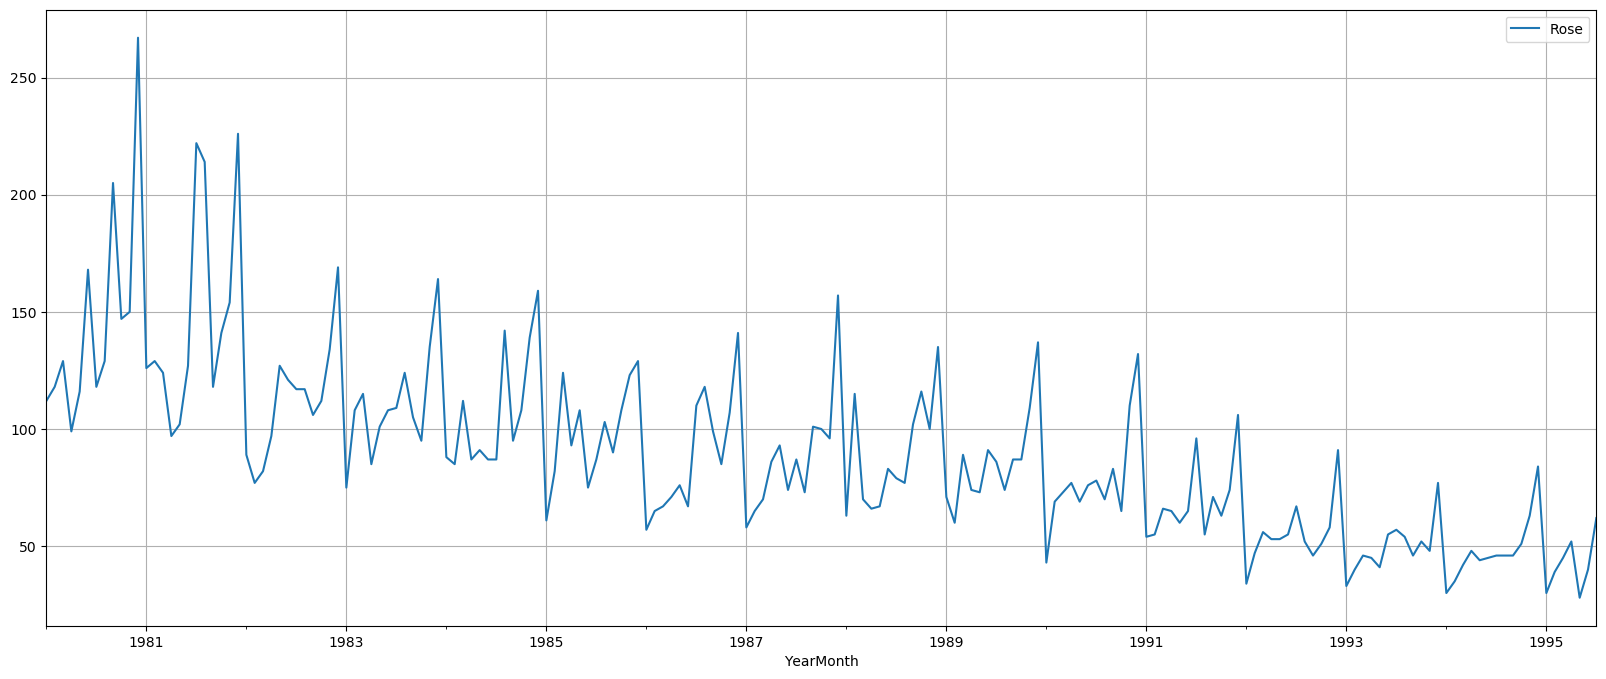

In [98]:
df_rose1.plot()
plt.grid()
plt.show()

In [101]:
#We see that there is a trend and a seasonality. So, now we take a seasonal differencing and check the series.

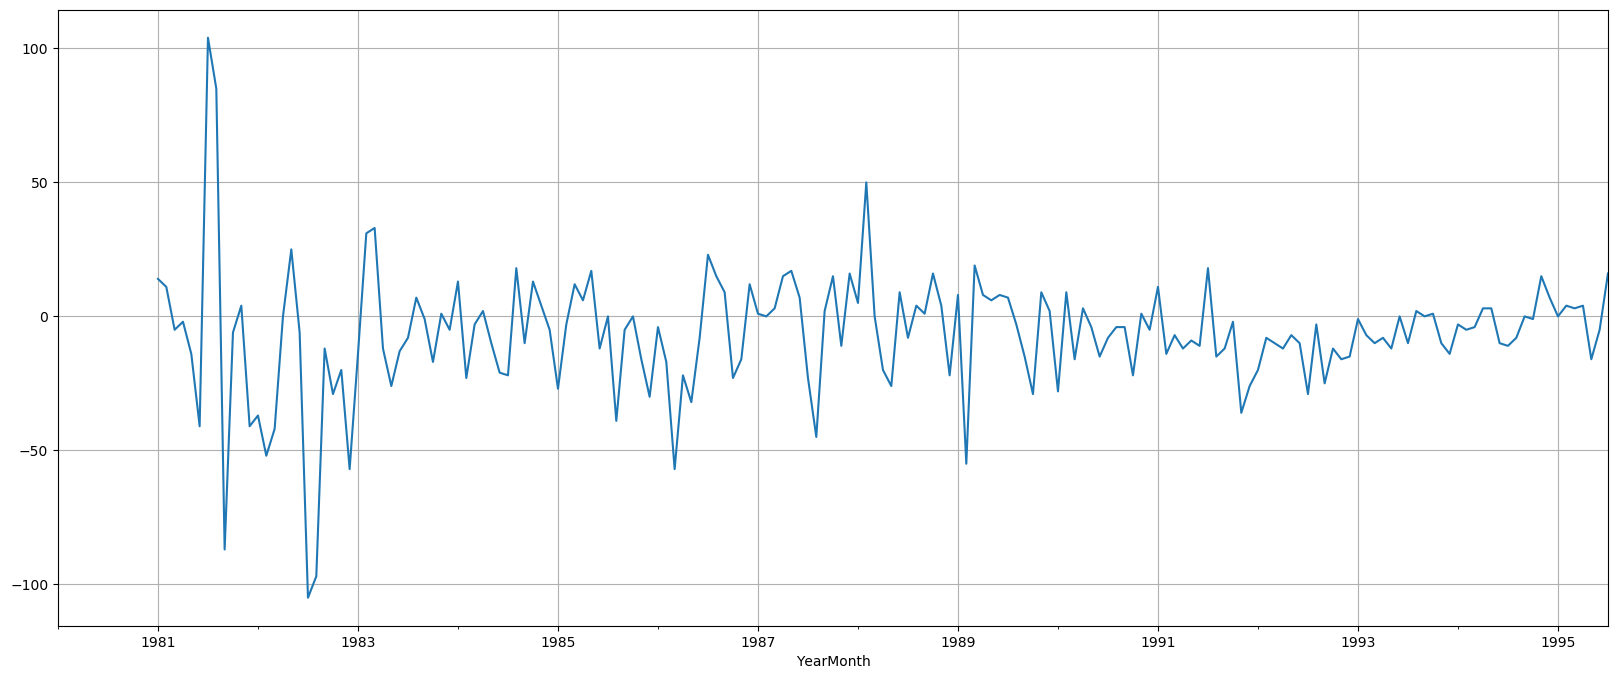

In [99]:
(df_rose1['Rose'].diff(12)).plot()
plt.grid()
plt.show()

In [103]:
#We see that there might be a slight trend which can be noticed in the data. So we take a differencing of first 
#order on the seasonally differenced series.



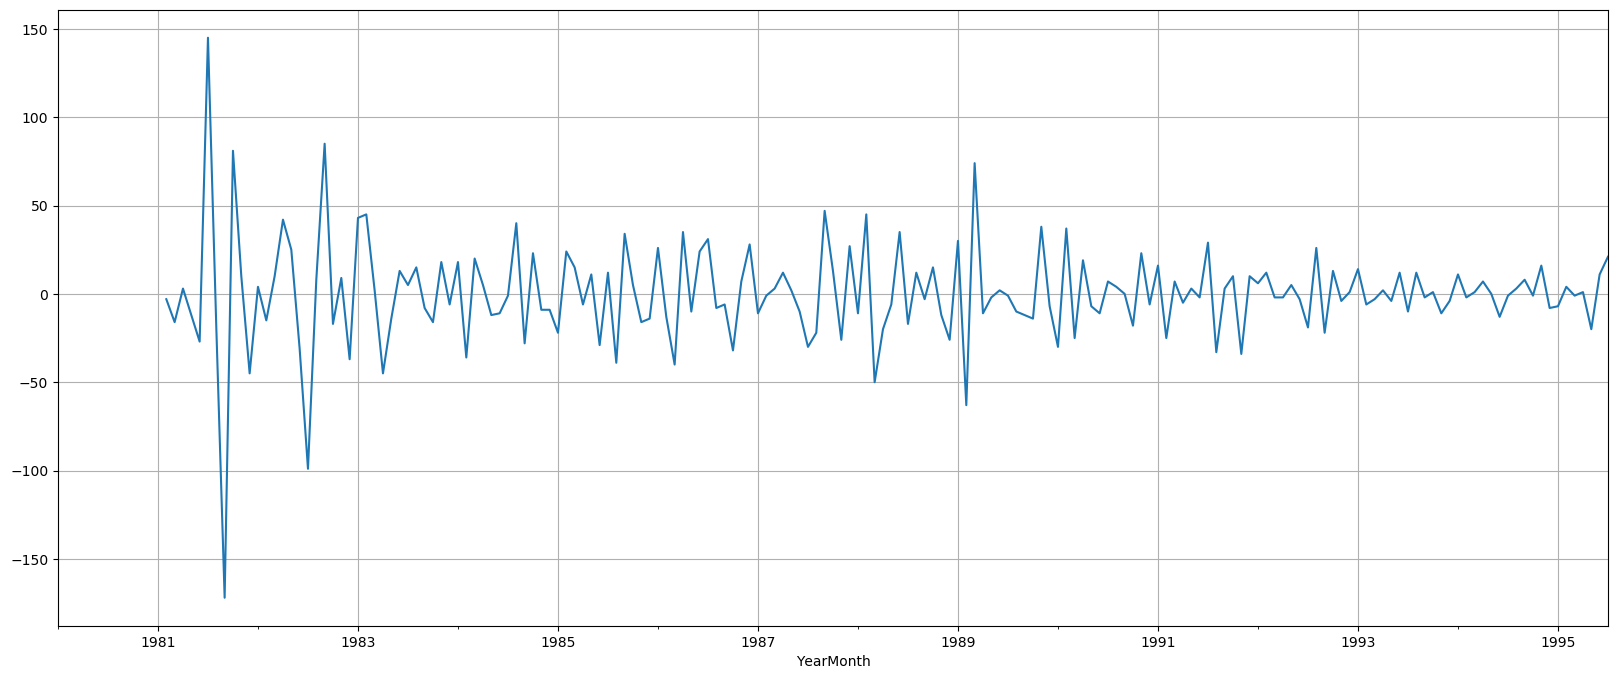

In [100]:
(df_rose1['Rose'].diff(12)).diff().plot()
plt.grid()
plt.show()

In [105]:
#Now we see that there is almost no trend present in the data. Seasonality is only present in the data.

#Let us go ahead and check the stationarity of the above series before fitting the SARIMA model.

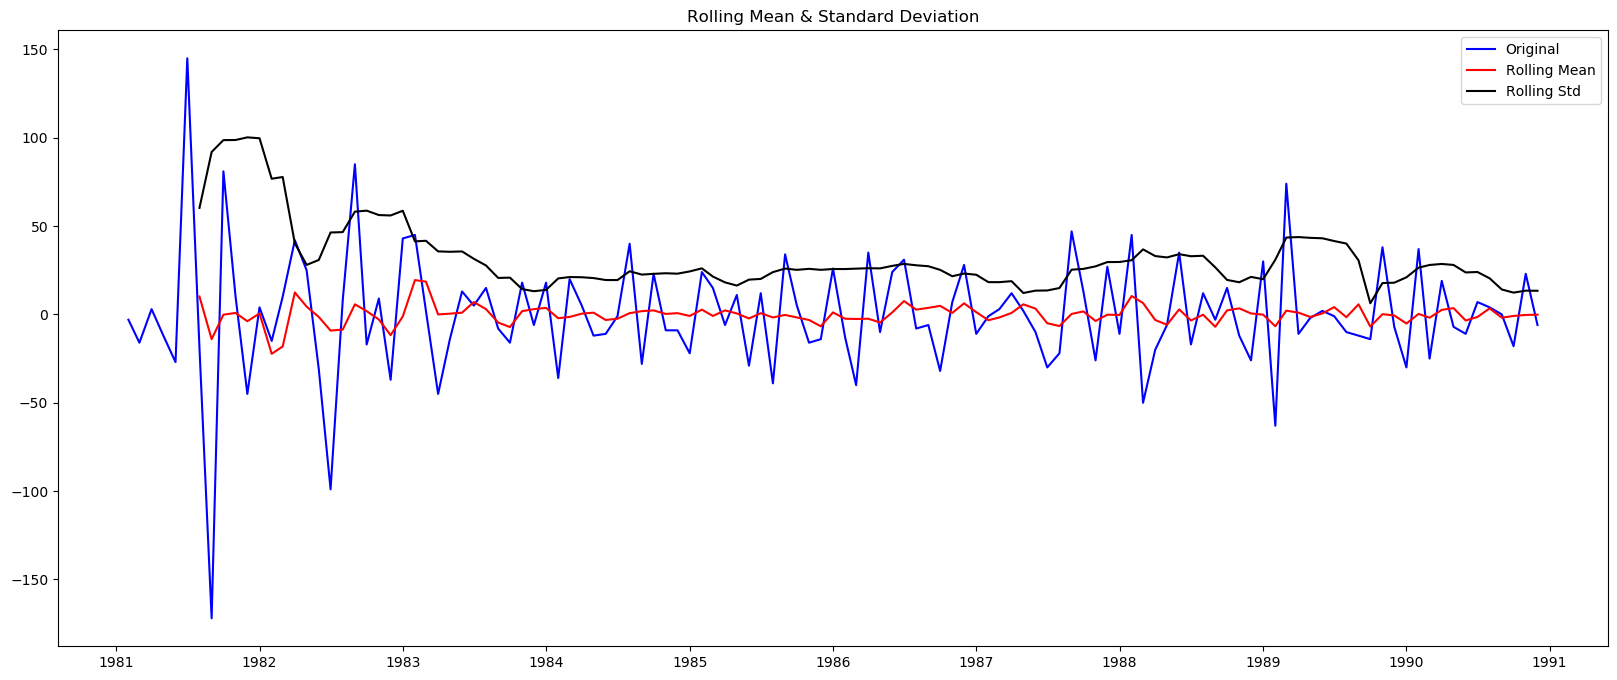

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [101]:
test_stationarity((train_rose['Rose'].diff(12).dropna()).diff(1).dropna())

In [107]:
#Checking the ACF and the PACF plots for the new modified Time Series.

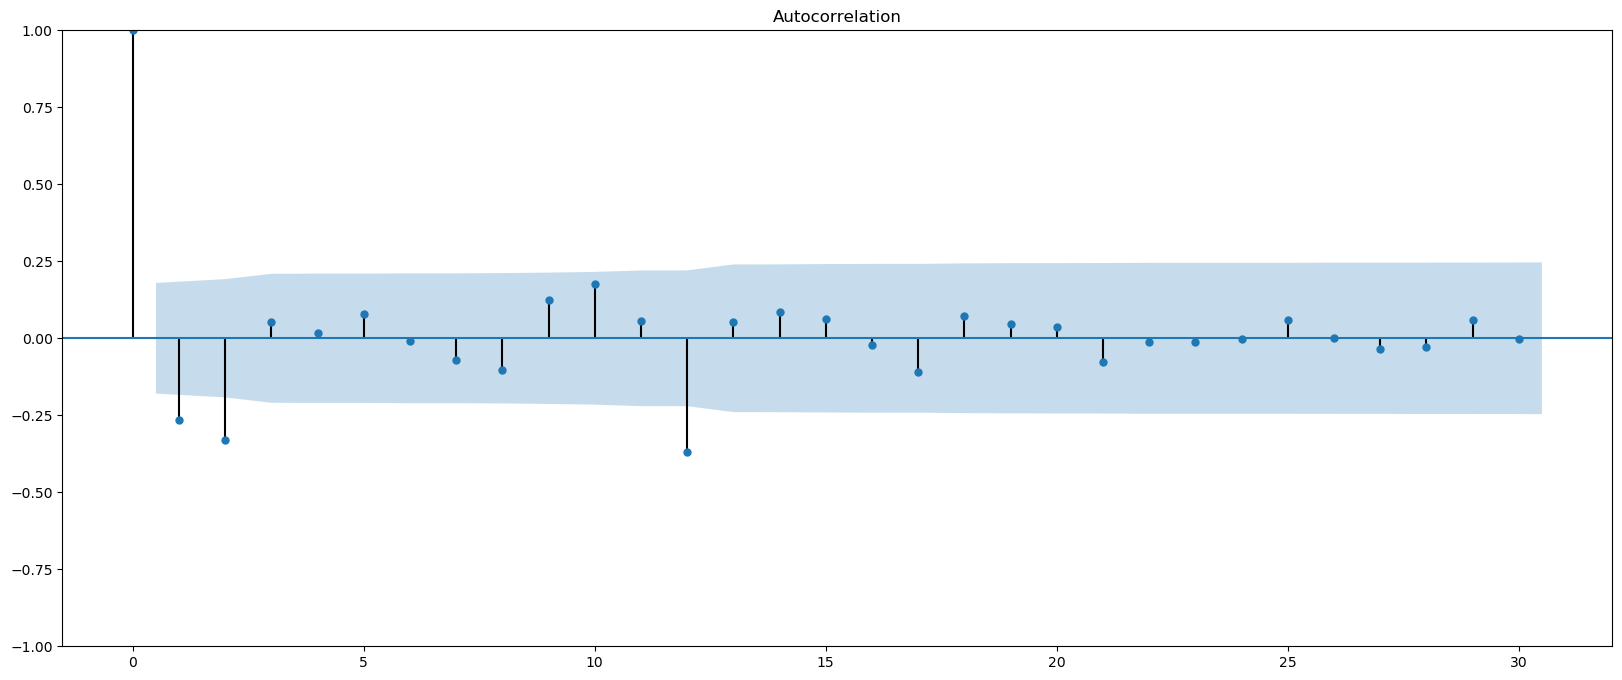

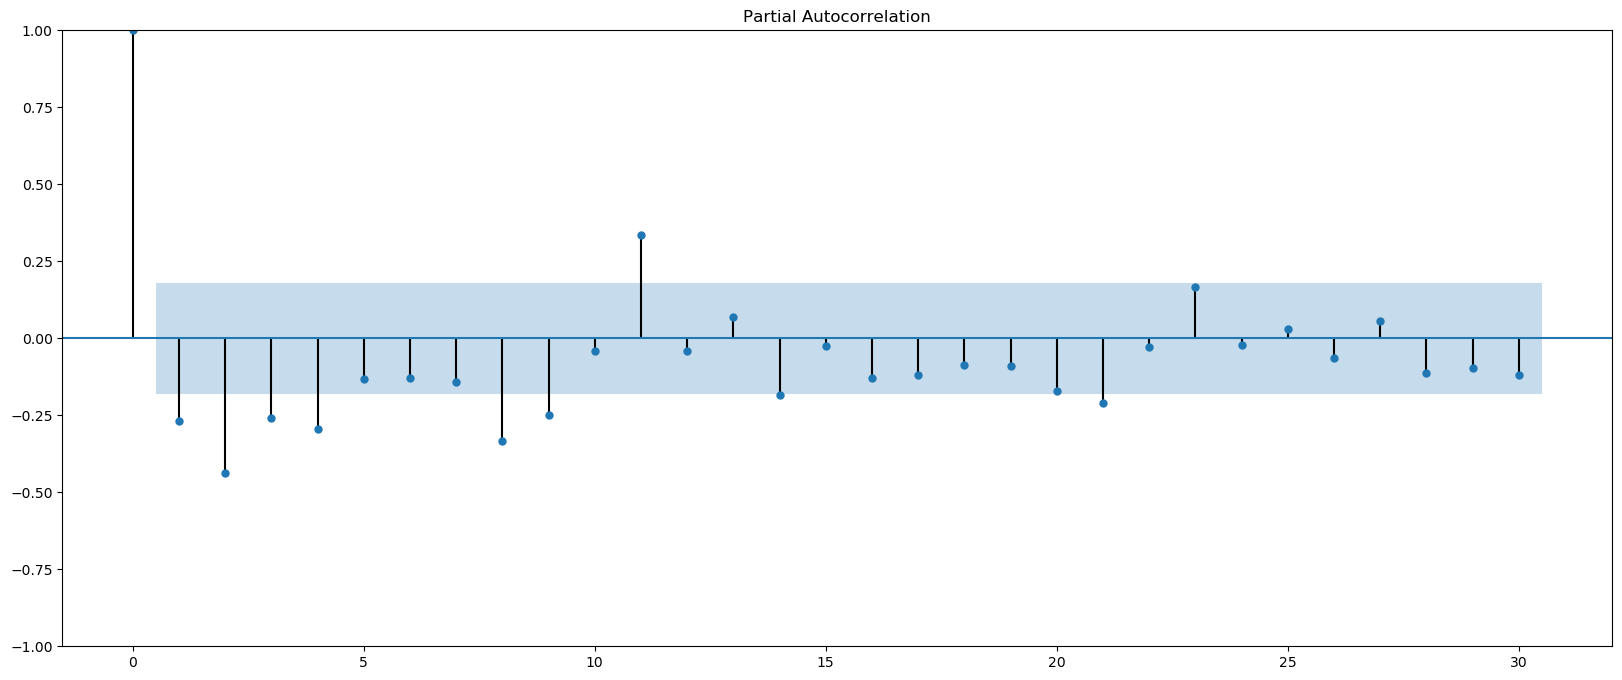

In [102]:
plot_acf((train_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((train_rose['Rose'].diff(12).dropna()).diff(1).dropna(),lags=30)
plt.show()

Here, we have taken alpha=0.05.




In [122]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(4,1,2),
                                seasonal_order=(4, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(4, 0, 2, 12)   Log Likelihood                -329.991
Date:                            Fri, 17 Dec 2021   AIC                            685.983
Time:                                    17:28:36   BIC                            716.786
Sample:                                         0   HQIC                           698.324
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7323      0.131      5.608      0.000       0.476       0.988
ar.L2         -0.2163      0.152   

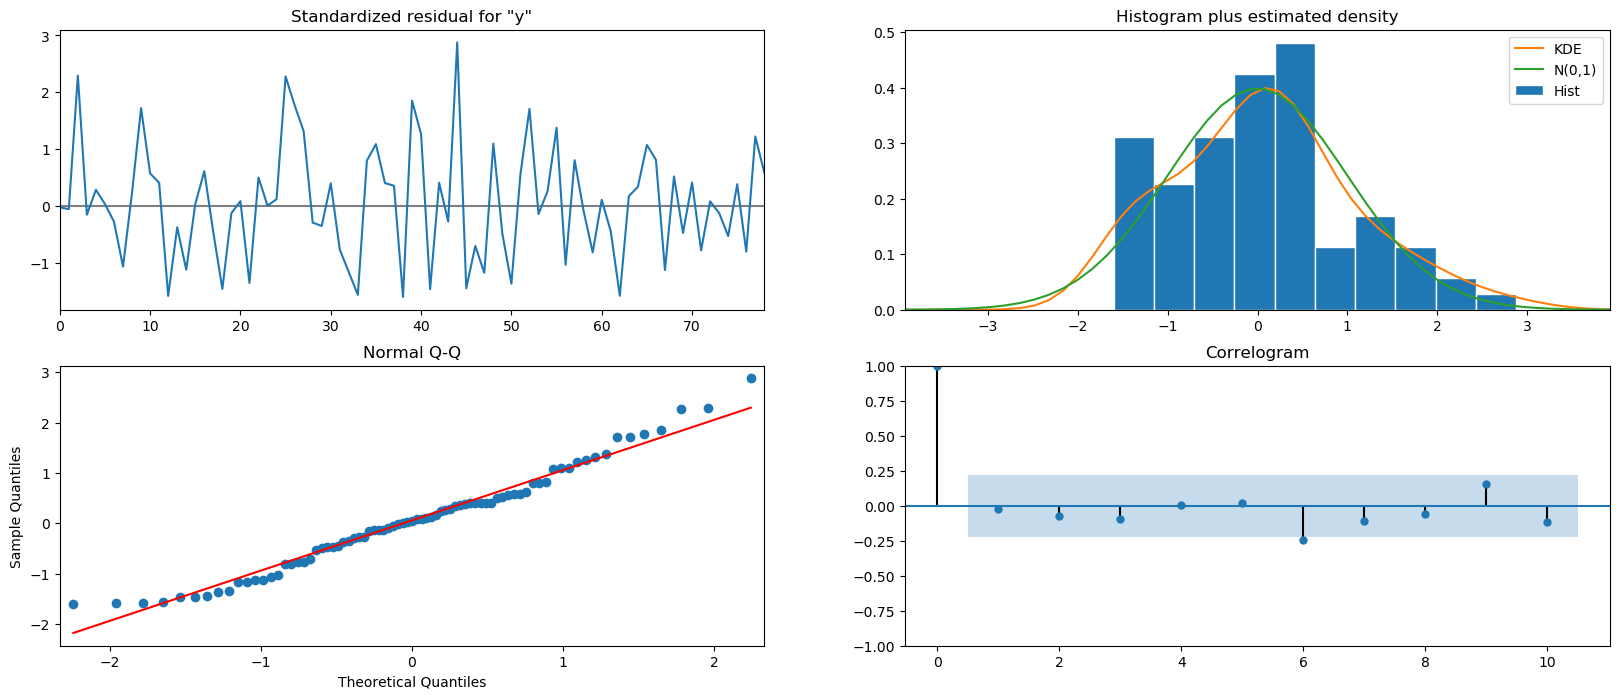

In [123]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

In [124]:
# Predict on the Test Set using this model and evaluate the model.

In [125]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test_rose['Rose']))

In [126]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,46.471248,14.737585,17.586112,75.356383
1,71.618187,14.839080,42.534125,100.702250
2,67.081437,15.083753,37.517825,96.645049
3,64.330471,15.477871,33.994401,94.666540
4,68.439341,15.704989,37.658129,99.220554


In [127]:
from sklearn import metrics
RMSE_SARIMA_MANUAL_12 = sqrt(metrics.mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_12.predicted_mean))
print(RMSE_SARIMA_MANUAL_12)

18.488746202030534


In [128]:
RMSE_SARIMA_MANUAL_12

18.488746202030534

In [129]:

RMSE_Analysis.loc['RMSE_SARIMA_MANUAL_12'] = [RMSE_SARIMA_MANUAL_12]
RMSE_Analysis.sort_values(by='Test RMSE')

,Test RMSE
2 Point Moving Average,11.529409
4 Point Moving Average,14.448930
6 Point Moving Average,14.560046
9 Point Moving Average,14.724503
Linear Regression,15.262509
RMSE_SARIMA_MANUAL_12,18.488746
RMSE_SARIMA_12,18.860591
Triple Exp Smoothing,19.088888
RMSE_SARIMA_6,27.101049
Simple Exp Smoothing,36.775788


***1.8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.***

In [99]:
RMSE_Analysis

,Test RMSE
Simple Exp Smoothing,36.775788
Double Exp Smoothing,265.543452
Triple Exp Smoothing,19.088888
Linear Regression,15.262509
Naive Bayes,79.699093
Simple Average,53.440426
2 Point Moving Average,11.529409
4 Point Moving Average,14.448930
6 Point Moving Average,14.560046
9 Point Moving Average,14.724503


In [100]:
# Builing the table with name of model, parameters and their RMSE values on test data

Parameters=['smoothing_level: 0.098','Alpha Values:0.30,Beta Values:0.30','Alpha=0.077,Beta=0.039,Gamma=0.0008','NA','NA','NA','Trailing_2','Trailing_4','Trailing_6','Trailing_9','(2, 1, 3)x(2, 0, 3, 6)','(3, 1, 1)x(3, 0, 2, 12)','(1, 1, 1)x(4, 1, 2, 12)']

In [101]:
Parameters

['smoothing_level: 0.098',
 'Alpha Values:0.30,Beta Values:0.30',
 'Alpha=0.077,Beta=0.039,Gamma=0.0008',
 'NA',
 'NA',
 'NA',
 'Trailing_2',
 'Trailing_4',
 'Trailing_6',
 'Trailing_9',
 '(2, 1, 3)x(2, 0, 3, 6)',
 '(3, 1, 1)x(3, 0, 2, 12)',
 '(1, 1, 1)x(4, 1, 2, 12)']

In [102]:
RMSE_Analysis.insert(0,'Parameters',Parameters)

In [103]:
RMSE_Analysis.sort_values(by='Test RMSE')

,Parameters,Test RMSE
2 Point Moving Average,Trailing_2,11.529409
4 Point Moving Average,Trailing_4,14.448930
6 Point Moving Average,Trailing_6,14.560046
9 Point Moving Average,Trailing_9,14.724503
Linear Regression,NA,15.262509
RMSE_SARIMA_MANUAL_12,"(1, 1, 1)x(4, 1, 2, 12)",17.517446
RMSE_SARIMA_12,"(3, 1, 1)x(3, 0, 2, 12)",18.860591
Triple Exp Smoothing,"Alpha=0.077,Beta=0.039,Gamma=0.0008",19.088888
RMSE_SARIMA_6,"(2, 1, 3)x(2, 0, 3, 6)",27.101049
Simple Exp Smoothing,smoothing_level: 0.098,36.775788


In [141]:
list(range(1,13))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

***1.9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.***

In [37]:
# We see that most optimum model is 2 Point Moving average, however to predict the unknown future 12 months which do not have any data to compare.
# We would there use the next best model that is Linear regression
# We can predict the future 12 months on complete data
predicted_future12months=pd.DataFrame(columns=['YearMonth','Sale','Timeunits'])
predicted_future12months['YearMonth'] = pd.date_range(start='1995-08-01', periods=12, freq='M')
predicted_future12months['Timeunits'] = list(range(188,200))
predicted_future12months.set_index('YearMonth',inplace=True)
predicted_future12months


,Sale,Timeunits
YearMonth,,
1995-08-31,NaN,188
1995-09-30,NaN,189
1995-10-31,NaN,190
1995-11-30,NaN,191
1995-12-31,NaN,192
1996-01-31,NaN,193
1996-02-29,NaN,194
1996-03-31,NaN,195
1996-04-30,NaN,196


In [16]:
# Applying Linear regression on entire dataset

Timeunits_rose = [i+1 for i in range(len(df_rose1))]



In [38]:
LinearRegression_futurepredictions = df_rose1.copy()
LinearRegression_futurepredictions['Timeunits'] = Timeunits_rose
LinearRegression_futurepredictions.tail()

,Rose,Timeunits
YearMonth,,
1995-03-01,45.0,183
1995-04-01,52.0,184
1995-05-01,28.0,185
1995-06-01,40.0,186
1995-07-01,62.0,187


In [39]:


lr_predictions = LinearRegression()
lrp=lr_predictions.fit(LinearRegression_futurepredictions[['Timeunits']],LinearRegression_futurepredictions['Rose'].values)
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model_LR_future12months = lr_predictions .predict(predicted_future12months[['Timeunits']])
model_LR_future12months

array([40.63688115, 40.11259492, 39.5883087 , 39.06402248, 38.53973625,
       38.01545003, 37.49116381, 36.96687759, 36.44259136, 35.91830514,
       35.39401892, 34.86973269])

In [44]:
predicted_future12months['Predicted_Sale'] = model_LR_future12months
predicted_future12months.drop('Sale', axis=1,inplace=True)


In [45]:
predicted_future12months

,Timeunits,Predicted_Sale
YearMonth,,
1995-08-31,188,40.636881
1995-09-30,189,40.112595
1995-10-31,190,39.588309
1995-11-30,191,39.064022
1995-12-31,192,38.539736
1996-01-31,193,38.015450
1996-02-29,194,37.491164
1996-03-31,195,36.966878
1996-04-30,196,36.442591


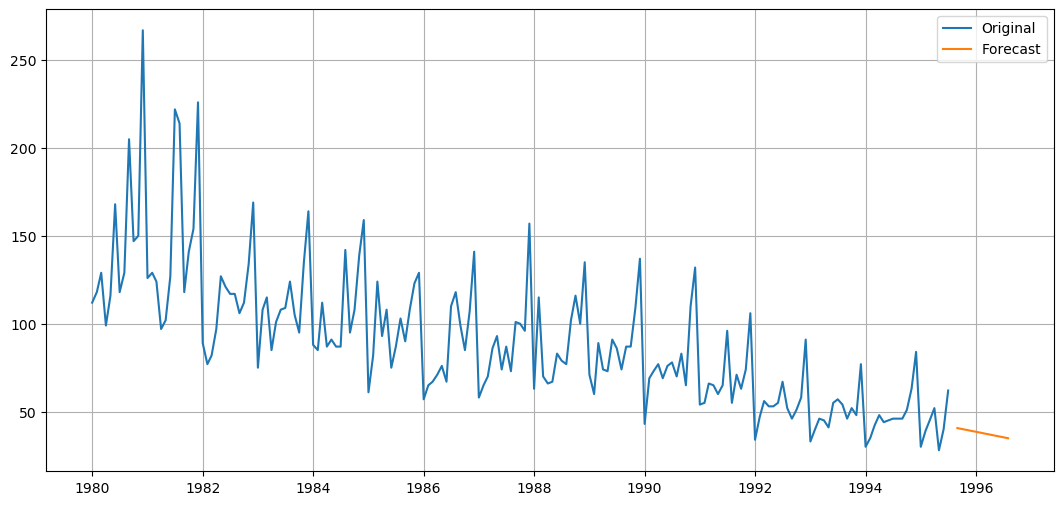

In [46]:
plt.figure(figsize=(13,6))
plt.plot( df_rose1['Rose'], label='Original')
plt.plot(predicted_future12months['Predicted_Sale'], label='Forecast')

plt.legend(loc='best')
plt.grid();
plt.show()

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
LOWER_ALPHA = 0.05
UPPER_ALPHA = 0.95

lower_model = GradientBoostingRegressor(loss="quantile",                   
                                        alpha=LOWER_ALPHA)

upper_model = GradientBoostingRegressor(loss="quantile",
                                        alpha=UPPER_ALPHA)
lower_model.fit(LinearRegression_futurepredictions[['Timeunits']],LinearRegression_futurepredictions['Rose'].values)

upper_model.fit(LinearRegression_futurepredictions[['Timeunits']],LinearRegression_futurepredictions['Rose'].values)


# Predict
predicted_future12months['lower 0.05 CI'] = lower_model.predict(predicted_future12months[['Timeunits']])

predicted_future12months['upper 0.95 CI'] = upper_model.predict(predicted_future12months[['Timeunits']])

import warnings
warnings.filterwarnings('ignore')

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1348: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.object)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1570: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sample_mask = np.ones((n_samples, ), dtype=np.bool)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklear

In [48]:
predicted_future12months

,Timeunits,Predicted_Sale,lower 0.05 CI,upper 0.95 CI
YearMonth,,,,
1995-08-31,188,40.636881,28.000353,83.998584
1995-09-30,189,40.112595,28.000353,83.998584
1995-10-31,190,39.588309,28.000353,83.998584
1995-11-30,191,39.064022,28.000353,83.998584
1995-12-31,192,38.539736,28.000353,83.998584
1996-01-31,193,38.015450,28.000353,83.998584
1996-02-29,194,37.491164,28.000353,83.998584
1996-03-31,195,36.966878,28.000353,83.998584
1996-04-30,196,36.442591,28.000353,83.998584


***1.10 Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.***

In [1]:
# Discussed in the Business report